In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib osx


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-04-04 12:51:43.238947'

In [2]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
#     cumsum_vec = np.cumsum(np.insert(interval, 0, 0)) 
#     return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size

In [3]:
quinn1986 = pd.read_csv(
    '/Users/imarkelo/git/Great-Lakes-Data/measurements/Previous Studies/Quin 1986 lake Erie Total Water Supply.csv')

In [4]:
quinn2008 = pd.read_csv(
    '/Users/imarkelo/git/Great-Lakes-Data/measurements/Previous Studies/Quin 2008 lake Erie Total Water Supply.csv')

In [5]:
WB_annual = pd.read_excel('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/Water Budget_gauged.xlsx', sheet_name='Total Annual 0.75 ERA5').reset_index()

st_clair_basin_inflow = WB_annual.iloc[1][2:-1].values + WB_annual.iloc[2][2:-1].values

western_basin_inflow = WB_annual.iloc[7][2:-1].values + WB_annual.iloc[8][2:-1].values

central_basin_inflow = WB_annual.iloc[12][2:-1].values + WB_annual.iloc[13][2:-1].values

eastern_basin_inflow = WB_annual.iloc[17][2:-1].values + WB_annual.iloc[18][2:-1].values

st_clair_river_inflow = WB_annual.iloc[0][2:-1].values

total_outflow = WB_annual.iloc[22][2:-1].values + WB_annual.iloc[23][2:-1].values

total_inflows = western_basin_inflow+central_basin_inflow+eastern_basin_inflow+st_clair_basin_inflow + st_clair_river_inflow

detroit_outflow = WB_annual.iloc[6][2:-1].values
# WB_annual

In [8]:
water_level_2 = pd.read_excel('../../measurements/Great_Lakes_Watrer_Level_monthlyAve.xlsx', skiprows=12)

Niagara_flow = pd.read_excel('../../measurements/USGS stream data/Niagara_annual_cfs.xlsx')

Niagara_flow['CFS'].values

Niagara_flow['CFS'] = pd.to_numeric(Niagara_flow['CFS'], errors='coerce')
Niagara_flow['Water Year'] = pd.to_numeric(Niagara_flow['Water Year'], errors='coerce')


In [26]:
nino4 = pd.read_csv('../../measurements/Oscillations/nino4.csv', skiprows=8)
# nino4 = nino4[nino4.Mean>-80]


for c in nino4.columns:
    nino4[c] = pd.to_numeric(nino4[c], errors='coerce')


nino4.head()

nino4_agg = nino4.groupby('Year').mean()[nino4.columns[1:]].stack().reset_index()
nino4_agg['M_n'] = nino4_agg['level_1'].apply(lambda x: datetime.strptime(x, '%B').month)
nino4_agg['Year_dec']= nino4_agg['Year'] + nino4_agg['M_n']/12

In [27]:
water_level_2[water_level_2.year>1939].groupby('year').mean()['Erie'].mean()

174.23863247863244

In [28]:
%matplotlib inline

In [29]:
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

Runoff_mm = pd.read_excel('../../measurements/glerl/Runoff.xlsx', sheetname='ERI_mm', skiprows=4)

Runoff_mm['Ann'] = pd.to_numeric(Runoff_mm['Ann'], errors='coerce')
Runoff_mm['YEAR'] = pd.to_numeric(Runoff_mm['YEAR'], errors='coerce')

In [30]:
stclair_river_level = pd.read_csv('../../measurements/St. Clair/stclair_river_level_hydat.csv')

stclair_river_level['Date'] = pd.to_datetime(stclair_river_level['Date'])

stclair_river_level_an = stclair_river_level.groupby(stclair_river_level.Date.dt.year).mean()

In [31]:
stclair_river_level_an.mean()

Unnamed: 0    16452.637363
Value           175.333884
Symbol                 NaN
dtype: float64

In [32]:
['January', 'February', 'March', 'December']

['January', 'February', 'March', 'December']

In [33]:
NAO = pd.read_excel('../../measurements/Oscillations/nao.xlsx')

NAO = NAO[NAO.Mean>-80]

PDO = pd.read_excel('../../measurements/Oscillations/pdo.xlsx', sheet_name='Data')


In [34]:
NAO

Year  January  February  March  April   May  June  July  August  \
4    1825    -0.23      0.21   0.33  -0.28  0.13  0.41 -0.92    1.43   
5    1826    -3.05      4.87  -0.97   1.78 -1.20  0.83  1.89    2.72   
6    1827    -0.45     -3.72   1.83  -0.83  1.20 -0.07  2.02   -3.56   
7    1828     1.27      0.37  -0.18   0.04 -1.59 -1.33 -4.40   -2.54   
8    1829    -2.48      0.32  -2.54   0.12  1.80 -0.10  0.33    0.77   
9    1830    -2.33      1.20   3.58   3.08 -0.05 -0.85  3.19   -0.35   
10   1831    -2.91      1.40   1.48  -3.15 -2.47 -1.36  2.71   -3.04   
11   1832    -0.04      0.83   2.12  -1.51 -1.96 -3.62 -2.57    0.92   
12   1833    -0.36      2.52  -2.89   2.02  0.69 -1.52  0.13   -1.74   
13   1834     3.07      2.66   1.37  -2.38 -1.03  0.27 -0.73   -0.86   
14   1835     0.37      3.37   1.54  -1.02  0.58  0.10  0.57    2.35   
15   1836     1.47      0.06   2.28   0.87 -1.50  2.95  4.33    2.80   
16   1837    -1.16      4.67  -3.08  -0.56 -1.02 -2.98 -2.40    0.01   
17   1838    -2.16     -1.81   1.23  -0.61 -2.16  1.24  0.11    1.16   
18   1839     1.24      4.20   0.79   1.40 -0.94  0.01  1.14    0.04   
19   1840     2.97     -0.40  -3.05   0.87 -0.58 -0.09  1.23    0.05   
20   1841    -0.71     -1.37   2.41   1.97  1.65 -0.61 -0.62    2.39   
21   1842     2.45      4.26   3.43  -0.44 -0.85 -4.30 -4.05    1.03   
22   1843     2.99     -3.51  -1.29   2.03 -0.49 -1.92  3.26    3.99   
23   1844     0.20      0.11   1.09   3.91 -2.77 -0.12  0.36   -1.00   
24   1845     1.17      0.06  -0.54   0.56 -0.97  2.07 -0.16   -0.29   
25   1846     2.26      0.63   1.75  -1.42  0.19  1.45  2.84   -0.30   
26   1847     0.03      0.10  -1.59   1.17  1.76 -0.26  0.75    1.13   
27   1848    -0.79      1.77   0.76  -1.02  0.69 -1.78  1.87    2.64   
28   1849     2.42      2.77  -0.56  -0.99 -0.52 -3.21  1.20    0.70   
29   1850    -0.16      4.13  -2.22   0.97 -1.16  0.40  0.31    0.15   
30   1851     3.29      1.03   1.50  -1.66 -1.53 -1.62 -5.39    4.68   
31   1852     1.46      0.41  -2.50  -1.60  0.25  0.09 -1.13    2.94   
32   1853     1.31     -4.04  -0.32   0.76 -3.17  1.09  1.76   -2.36   
33   1854     1.28      1.72   2.67   0.88  0.04 -0.06 -1.92   -0.03   
34   1855    -1.84     -3.80  -0.05   0.99 -2.28  0.78 -2.61    3.81   
35   1856    -1.25     -0.10  -2.27   2.00 -0.70  2.03 -0.16   -0.44   
36   1857    -0.69      2.02   1.09   0.55 -0.17 -0.33  5.36    1.02   
37   1858     2.26     -0.54  -1.24   1.24  0.53 -0.24 -1.58    0.06   
38   1859     2.74      2.37   1.50  -1.12 -0.63 -0.06  2.24    1.82   
39   1860     1.54      0.32   1.08  -0.37 -1.51 -2.32 -2.27   -0.16   
40   1861    -0.56      0.80   2.06  -1.86 -1.99 -1.04  0.73    2.91   
41   1862     1.15     -1.26  -2.25   0.64  0.65 -0.22 -2.08   -1.43   
42   1863     1.12      3.10   1.88   2.35 -1.49 -0.59 -0.43    0.10   
43   1864     2.03     -0.27  -1.78   0.23 -1.83  1.76  0.50   -0.21   
44   1865     0.15     -0.42  -1.03   0.92  0.87  0.74 -0.07   -0.22   
45   1866     2.06      0.70  -2.10  -0.88 -1.54 -0.18  0.29    0.77   
46   1867    -2.17      3.63  -3.03   3.08 -2.35 -1.20 -1.77    3.10   
47   1868     1.46      3.95   2.94   2.52  1.35  2.10  1.21    3.02   
48   1869     3.25      3.90  -1.91   2.62 -1.98 -0.71  0.29    1.15   
49   1870     0.32     -1.98  -2.07   2.92  1.55  0.56 -0.36   -3.41   
50   1871     0.67      1.71   1.15  -0.32 -2.50 -1.37  1.75    4.19   
51   1872     1.15      0.45  -1.20  -0.73  0.02 -0.34 -3.61   -1.43   
52   1873     2.30      0.18  -0.39  -2.17 -0.93  0.78 -0.12    3.44   
53   1874     1.56      2.07   1.47   2.99 -1.85 -0.76  0.18    0.82   
54   1875     2.06     -1.47  -0.61  -0.41  0.89  1.46 -1.44    1.71   
55   1876     1.10      0.75  -0.29  -0.67 -1.45  1.71  3.48    1.02   
56   1877     2.39      1.96  -0.45  -2.30 -1.73 -0.32  1.18   -1.83   
57   1878     1.18      2.20  -0.01   0.45  0.28 -1.54 -1.93   -2.46   
58   1879    -0.71      0.85  -0.08   0.10  0

In [35]:
np.linspace(2004,2017,14).shape

(14,)

In [36]:
total_outflow[1:].shape

(15,)

In [37]:
f, axes = plt.subplots(3,1, figsize=(12,6), dpi=200, sharex=True)

ax2 = axes[2].twinx()
ax3 = axes[2].twinx()
# ax4 = axes[2].twinx()

# ax2.spines["left"].set_position(("axes", -0.4)) # red one
ax3.spines["left"].set_position(("axes", -0.08)) # green one
# ax4.spines["right"].set_position(("axes", 1.08)) # red one

ax2.spines["right"].set_visible(True)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3.spines["left"].set_visible(True)
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_ticks_position('left')


# axes[2].scatter(quinn1986.year, quinn1986['Total Water supply m3 s'], label='Quinn (1986)', edgecolor=sns.color_palette()[0], s=100, marker='o', facecolors='white', zorder=2)
# axes[2].scatter(quinn2008.year[quinn2008.year>1980], quinn2008[quinn2008.year>1980]['Total outflow cms'], label='Quinn (2008)', edgecolor=sns.color_palette()[2], s=100, marker='o', facecolors='white', zorder=2)

axes[2].scatter(Niagara_flow['Water Year'][:-14], Niagara_flow['CFS'][:-14]*0.028316847*1.045, label='Lake Erie Outflow', edgecolor='k', s=80, marker='o', facecolors='white', zorder=2)
ax3.plot(stclair_river_level_an.index, stclair_river_level_an.Value, zorder=10, c='k', ls='--', lw=2, label='Water Level of St. Clair River')



# axes[2].plot(np.linspace(2003,2017,15), total_inflows, lw=2, ls='-', c='k', label='Total Inflow')
axes[2].scatter(np.linspace(2004,2017,14), total_outflow[1:-1],edgecolor='k', s=80, marker='o', facecolor='white', zorder=2)

# axes[2].plot(np.linspace(2003,2017,15), st_clair_river_inflow, lw=1, ls='-', c='k', label='St. Clair River')
# axes[2].plot(np.linspace(2003,2017,15), detroit_outflow, lw=1, ls='--', c='k', label='Detroit River')

# axes[2].grid(lw=0.3)


# NAO_w = NAO[['January', 'February', 'March', 'December']].mean(axis=1)
NAO_w = NAO[NAO.columns[1:]].mean(axis=1)

x = NAO.Year
y = NAO_w
xvals = np.linspace(1825, 2017, 15000)
yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

ax2.fill_between(xvals, 0, positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$NAO')
ax2.fill_between(xvals, 0, negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$NAO')
ax2.plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)


# NAO_w = NAO[['Mean',]].mean(axis=1)
# positive_signal = NAO_w.copy()
# negative_signal = NAO_w.copy()

# positive_signal[positive_signal < 0] = np.nan
# negative_signal[negative_signal > 0] = np.nan

# ax2.fill_between(NAO.Year, 0, positive_signal, zorder=1, alpha=0.4, color=sns.color_palette()[3], label='Annual Average NAO')
# ax2.fill_between(NAO.Year, 0, negative_signal, zorder=1, alpha=0.4, color=sns.color_palette()[0])
# ax2.plot(NAO.Year, NAO_w, zorder=1, c='k', alpha=1, lw=0.3)



# ax2.plot(NAO.Year, movingaverage(NAO.Mean, 5))
# ax2.scatter(NAO.Year, NAO[['December', 'January', 'February', 'March',]].mean(axis=1), marker='x', label='NAO')
# ax2.plot(NAO.Year, movingaverage(NAO[['December', 'January', 'February', 'March',]].mean(axis=1),10), c='k', lw=2, label='NAO - Winter (Dec-Mar, 10y MA)')



# ax2.scatter(PDO.YEAR,PDO[PDO.columns[1:]].mean(axis=1), c='k')
# ax2.plot(PDO.YEAR,movingaverage(PDO[PDO.columns[1:]].mean(axis=1), 10), c=sns.color_palette()[4], lw=2, label='PDO (10y MA)')
ax2.set_ylabel('North Atlantic Oscilation Index')
ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
ax2.set_xlim(1900,2017)
ax2.set_ylim(-1,2)
# ax2.legend(loc=4, framealpha=0.8)




# ax4.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, label='Precipitation (NOAA)')
# ax4.plot(Precip_mm.Year[10:], movingaverage(Precip_mm.Total, 10)[10:], c=sns.color_palette()[3], lw=3, label='Precipitation (10 years MA)')



ax3.plot(water_level_2.groupby('year').mean()['Erie'], c='k', lw=3,label='Water Level of LE')

axes[2].set_ylim(3980,9980)
axes[2].set_ylabel('Water outflows, $cms$')
axes[2].set_yticks([4000, 5000, 5980, 7000, 8000, 9000])

ax3.axhline(175.33, c='k', ls='-.', lw=1, zorder=10)
ax3.set_ylabel('Water Level, m')
ax3.set_ylim(174.14-1,175.14+1)
# ax3.legend(loc=(0.5,0.1))
ax3.set_yticks([ 173.4, 173.8, 174.14, 174.6, 175., 175.33, 175.8 ])

# axes[2].legend(loc=3, framealpha=0.8, facecolor='w')
axes[2].set_zorder(1) # make it on top
axes[2].set_frame_on(False) # make it transparent
ax2.set_frame_on(True) # make sure there is any background

# ax4.set_ylim(0,1200)




axes[0].set_xlim(1900,2020)
# axes[0].set_xticks(np.linspace(2000,2017,18)[::2])
#     ax.set_ylim(0,15)
axes[0].set_xlabel('')
# axes[0].grid(lw=0.2)

# axes[0].plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, )
axes[0].scatter(Precip_mm.Year, Precip_mm.Total,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Precipitation (NOAA)')


axes[0].plot(Precip_mm.Year[5:], movingaverage(Precip_mm.Total, 10)[5:], c=sns.color_palette()[3], lw=2, label='Precipitation (10-Year Moving Average)')
# axes[0].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Runoff (GLERL, model)')
x = np.linspace(1900,2020, 121)
axes[0].plot(x, 840.5+0.485*(x-1900), 'k-.', lw=1, label='Precipitation Trend (Linear Regression)')
# axes[0].legend(loc=2)
# axes[0].legend(loc=3,fontsize='small')
axes[0].set_ylim(500,1200)
axes[0].set_xlim(1900,2017)
# axes[0].set_ylim(0,8)
# axes[0].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[0].set_ylabel('Precipitation, $mm\cdot y^{-1}$')
plt.tight_layout()






# axes[1].plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2, label='Wind Speed GLERL')
# axes[1].plot(df.YY, df.WSPD, c=sns.color_palette()[0], lw=1, ls=':', label='Bouy 45005')
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes[1].plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
axes[1].set_xlim(1900,2017)
# axes[1].set_xticks(np.linspace(2000,2017,18)[::2])
#     ax.set_ylim(0,15)
axes[1].set_xlabel('')
# axes[1].grid(lw=0.2)

# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, 
#           c=sns.color_palette()[0], lw=1, label='Runoff (NOAA)')
axes[1].scatter(Runoff_mm.YEAR, Runoff_mm.Ann,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Runoff (NOAA)')
axes[1].plot(Runoff_mm.YEAR, movingaverage(Runoff_mm.Ann, 10),
          c=sns.color_palette()[3], lw=2, label='Runoff (10-Year Moving Average)')
# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Evaporat (GLERL, model)')
# axes[1].plot(Evap_mm.set_index('Year')[:-7].Ann.index, Evap_mm.set_index('Year')[:-7].Ann.values)
x = np.linspace(1900,2020, 121)
axes[1].plot(x, 576+3.82*(x-1914), 'k-.', lw=1, label='Runoff Trend (Linear Regression)')
# axes[1].legend(loc=2)
# axes[1].legend(loc=3,fontsize='small')
axes[1].set_ylim(200,1250)
# axes[1].set_ylim(0,8)
# axes[1].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[1].set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()



text = 'Linear Regression\n$slope$ = 0.49, $y_0$ = 840'

props = dict(boxstyle='square', facecolor='white', alpha=0.8, edgecolor='black')
axes[0].text(0.85, 0.22, text, transform=axes[0].transAxes,
        verticalalignment='top', bbox=props)


text = 'Linear Regression\n$slope$ = 3.82, $y_0$ = 534'

props = dict(boxstyle='square', facecolor='white', alpha=0.8, edgecolor='black')
axes[1].text(0.85, 0.22, text, transform=axes[1].transAxes,
        verticalalignment='top', bbox=props)



handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles, labels = axes[2].get_legend_handles_labels()
f.legend( handles + handles3 + handles2, labels + labels3 + labels2, loc = (0.13, 0.32), ncol=6, frameon=0, framealpha=0.5, fontsize='large')
plt.tight_layout()


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.2, 0.637), ncol=3, frameon=0, framealpha=0.5, fontsize='large')


handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.14, 0.957), ncol=3, frameon=0, framealpha=1, fontsize='large')

# ax2 = axes[1].twinx()
# ax2.plot(wl_lake_erie_annual.index, wl_lake_erie_annual.values, lw=1)
# ax2.set_ylim(173,175)


# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/previous_and_nao_precip_runoff.pdf', dpi=f.dpi)


In [38]:
Runoff_mm

YEAR         JAN         FEB         MAR         APR         MAY  \
0    1898.0         NaN         NaN         NaN         NaN         NaN   
1    1899.0  118.415503   62.084014  211.980248   67.197348   21.708588   
2    1900.0   55.131268   78.503511  170.372294   86.150213   10.264421   
3    1901.0   26.068023   36.621228  122.303873   38.493721   34.337713   
4    1902.0         NaN         NaN         NaN         NaN         NaN   
5    1903.0         NaN         NaN         NaN         NaN   23.143669   
6    1904.0         NaN         NaN  315.422766  195.245174   34.390864   
7    1905.0         NaN         NaN  115.209761   72.635505  139.072533   
8    1906.0   82.842808   28.303699   72.973373   87.385700   15.995363   
9    1907.0         NaN         NaN         NaN         NaN         NaN   
10   1908.0         NaN         NaN         NaN         NaN         NaN   
11   1909.0         NaN         NaN         NaN         NaN         NaN   
12   1910.0         NaN         NaN         NaN         NaN         NaN   
13   1911.0         NaN         NaN         NaN         NaN         NaN   
14   1912.0         NaN         NaN         NaN         NaN         NaN   
15   1913.0         NaN         NaN         NaN         NaN         NaN   
16   1914.0   31.333111   41.923701  146.567884   90.798668   59.796062   
17   1915.0   26.216012   62.853075  102.965200   71.409096   27.808462   
18   1916.0  244.340948   92.758872  142.089641  123.566792   83.607767   
19   1917.0   43.824669   25.575745  128.703894  123.523424   60.813228   
20   1918.0   10.112263  136.482416  183.381815   37.205790   24.094136   
21   1919.0   42.091525   20.293982  186.151927   77.190163   81.425444   
22   1920.0    9.720403   15.838902  152.198777  127.826951   31.105916   
23   1921.0   64.403535   73.272579  201.743966  109.707156   75.148400   
24   1922.0   36.158400   56.076491  150.979428  236.435785   96.741307   
25   1923.0   87.421100   49.204834  158.486243   75.333404   84.766670   
26   1924.0  120.929239   66.317480  169.485400   90.985251   63.735498   
27   1925.0   12.274784  124.056011  139.675955   16.671502   11.793297   
28   1926.0   61.569850  124.664106  134.664116  164.462904   16.362210   
29   1927.0   99.791765  150.377284  179.536174   83.565273   82.330056   
30   1928.0   92.279739  129.263612   74.010341   83.999963   22.587145   
31   1929.0  134.141984   69.247482  160.982262  171.800181  112.691856   
32   1930.0  317.407075  107.532969  103.353932   86.529432   15.907820   
33   1931.0   19.476241   22.981459   39.962353   66.865532   25.787677   
34   1932.0  180.106246   62.021887   52.861403   54.901989   42.950280   
35   1933.0   91.855572   46.949424  166.818464  124.047875  146.647090   
36   1934.0   32.129336    6.268270   73.374612   94.645317    7.485972   
37   1935.0   45.566150   43.317800   80.592743   18.916557   80.321777   
38   1936.0   12.616619   89.146713  130.346368   41.437709   25.540680   
39   1937.0  241.795947   92.945287   47.759936  121.106914   43.613106   
40   1938.0   24.627732  114.538295  170.828769  143.061254   19.335547   
41   1939.0   19.155250  131.668490  190.281040  123.310618   17.628458   
42   1940.0   15.217898   46.323377  125.052099  176.167247   37.240182   
43   1941.0   59.218694   32.501058   50.003748   56.005354   12.473840   
44   1942.0   24.230661  109.986057  180.768030  134.708358   35.213144   
45   1943.0   90.857164   98.821025  134.971559   62.045622  258.604210   
46   1944.0   15.182464   47.621999  137.507180  186.954808   69.232992   
47   1945.0   10.391567   74.978256  168.377564   97.972557  126.481969   
48   1946.0   79.955972   56.118851  115.862165   17.007353   53.406462   
49   1947.0  104.298147   48.433890   92.927974  218.919110  158.045401   
50   1948.0   56.005657  100.880136  232.145370  100.570609   98.990329   
51   1949.0  154.578072  128.607308   88.297573   74.170534   55.417868   
52   1950.0  282.348174  170.099

# El Nino 4

In [39]:
nino4 = pd.read_csv('../../measurements/Oscillations/nino4.csv', skiprows=8)
# nino4 = nino4[nino4.Mean>-80]


for c in nino4.columns:
    nino4[c] = pd.to_numeric(nino4[c], errors='coerce')


nino4.head()

nino4_agg = nino4.groupby('Year').mean()[nino4.columns[1:]].stack().reset_index()
nino4_agg['M_n'] = nino4_agg['level_1'].apply(lambda x: datetime.strptime(x, '%B').month)
nino4_agg['Year_dec']= nino4_agg['Year'] + nino4_agg['M_n']/12

In [42]:
f, axes = plt.subplots(1,1, figsize=(12,4), dpi=200, sharex=True)

ax2 = axes.twinx()
ax3 = axes.twinx()

# ax2.spines["left"].set_position(("axes", -0.4)) # red one
ax3.spines["left"].set_position(("axes", -0.08)) # green one

ax2.spines["right"].set_visible(True)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3.spines["left"].set_visible(True)
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_ticks_position('left')


# axes.scatter(quinn1986.year, quinn1986['Total Water supply m3 s'], label='Quinn (1986)', edgecolor=sns.color_palette()[0], s=100, marker='o', facecolors='white', zorder=2)
# axes.scatter(quinn2008.year[quinn2008.year>1980], quinn2008[quinn2008.year>1980]['Total outflow cms'], label='Quinn (2008)', edgecolor=sns.color_palette()[2], s=100, marker='o', facecolors='white', zorder=2)

axes.scatter(Niagara_flow['Water Year'][:-14], Niagara_flow['CFS'][:-14]*0.028316847*1.03, label='Lake Erie Outflow', edgecolor='k', s=130, marker='o', facecolors='white', zorder=2)
# axes.scatter(Niagara_flow['Water Year'], Niagara_flow['CFS']*0.028316847*1.045, zorder=10)



# axes.plot(np.linspace(2003,2017,15), total_inflows, lw=2, ls='-', c='k', label='Total Inflow')
axes.scatter(np.linspace(2004,2017,14), total_outflow[1:-1],edgecolor='k', s=130, marker='o', facecolor='white', zorder=2)

# axes.plot(np.linspace(2003,2017,15), st_clair_river_inflow, lw=1, ls='-', c='k', label='St. Clair River')
# axes.plot(np.linspace(2003,2017,15), detroit_outflow, lw=1, ls='--', c='k', label='Detroit River')

axes.grid(lw=0.3)


# NAO_w = NAO[NAO.columns[1:]].mean(axis=1)

x = nino4_agg.Year_dec
y = nino4_agg[0]
xvals = np.linspace(1825, 2017, 15000)
yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

ax2.fill_between(xvals, 0, positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$ENSO')
ax2.fill_between(xvals, 0, negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$ENSO')
ax2.plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)


# NAO_w = NAO[['Mean',]].mean(axis=1)
# positive_signal = NAO_w.copy()
# negative_signal = NAO_w.copy()

# positive_signal[positive_signal < 0] = np.nan
# negative_signal[negative_signal > 0] = np.nan

# ax2.fill_between(NAO.Year, 0, positive_signal, zorder=1, alpha=0.4, color=sns.color_palette()[3], label='Annual Average NAO')
# ax2.fill_between(NAO.Year, 0, negative_signal, zorder=1, alpha=0.4, color=sns.color_palette()[0])
# ax2.plot(NAO.Year, NAO_w, zorder=1, c='k', alpha=1, lw=0.3)



# ax2.plot(NAO.Year, movingaverage(NAO.Mean, 5))
# ax2.scatter(NAO.Year, NAO[['December', 'January', 'February', 'March',]].mean(axis=1), marker='x', label='NAO')
# ax2.plot(NAO.Year, movingaverage(NAO[['December', 'January', 'February', 'March',]].mean(axis=1),10), c='k', lw=2, label='NAO - Winter (Dec-Mar, 10y MA)')



# ax2.scatter(PDO.YEAR,PDO[PDO.columns[1:]].mean(axis=1), c='k')
# ax2.plot(PDO.YEAR,movingaverage(PDO[PDO.columns[1:]].mean(axis=1), 10), c=sns.color_palette()[4], lw=2, label='PDO (10y MA)')
ax2.set_ylabel('El Niño-Southern Oscillation Index')
ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
ax2.set_xlim(1920,2017)
ax2.set_ylim(-2,2)
# ax2.legend(loc=4, framealpha=0.8)


ax3.plot(water_level_2.groupby('year').mean()['Erie'], c='k', lw=3,label='Water Level')

axes.set_ylim(3980,7980)
axes.set_ylabel('Water outflows, $cms$')
axes.set_yticks([4500,5000, 5500, 5980, 6500, 7000, 7500])


ax3.set_ylabel('Water Level, m')
ax3.set_ylim(174.14-1,174.14+1)
# ax3.legend(loc=(0.5,0.1))
ax3.set_yticks([ 173.4, 173.6, 173.8, 174. , 174.14, 174.4, 174.6, 174.8, 175. ])

# axes.legend(loc=3, framealpha=0.8, facecolor='w')
axes.set_zorder(1) # make it on top
axes.set_frame_on(False) # make it transparent
ax2.set_frame_on(True) # make sure there is any background



handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles, labels = axes.get_legend_handles_labels()
f.legend( handles + handles3 + handles2, labels + labels3 + labels2, loc = (0.25, 0.94), ncol=4, frameon=0, framealpha=0.5, fontsize='large')
plt.tight_layout()

# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/previous_and_nao.pdf', dpi=f.dpi)


In [43]:
x = nino4_agg.Year_dec
y = nino4_agg[0]

In [44]:
import matplotlib
matplotlib.rc

font = {'family' : 'Times New Roman',
        'size'   : 12}
matplotlib.rc('font', **font)

In [61]:
f = plt.figure(figsize=(8,3), dpi=200)
ax = plt.gca()



ax2 = ax.twinx()
ax.plot(water_level.groupby('year').mean()['Erie'].index, np.nan_to_num(water_level.groupby('year').mean()['Erie'].diff()), 'k', lw=2, label='$\Delta$ WL', zorder=0)
ax.set_ylabel('Change in water level $\Delta WL$, m')
xvals = np.linspace(1825, 2017, 15000)
ax.legend(framealpha=1,frameon=1,loc=2)
ax.set_ylim(-0.6,0.6)

text = 'Pearson correlation\n$r$ = 0.23, $p$ = 0.01'

props = dict(boxstyle='square', facecolor='white', alpha=0.6, edgecolor='black')
ax2.text(0.99, 0.02, text, transform=ax.transAxes,verticalalignment='bottom', horizontalalignment='right',bbox=props)


yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

ax2.fill_between(xvals, 0, positive_signal,  alpha=0.2, color=sns.color_palette()[3], label='$+$ENSO', zorder=0)
ax2.fill_between(xvals, 0, negative_signal,  alpha=0.2, color=sns.color_palette()[0], label='$-$ENSO', zorder=0)
ax2.plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)
ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
ax2.set_ylabel('ENSO')

ax2.set_xlabel('')
ax2.set_xlim(1918,2016)
ax2.legend(fancybox=True, framealpha=1,loc=1, fontsize='small')
ax2.set_ylim(-2,2)


# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/corr_dwl_enso.pdf', dpi=f.dpi)

# ax.set_yscale('log')
# ax.set_xscale('log')

(-2, 2)

In [82]:
fig = plt.figure()
ax = plt.gca()
ax.scatter( water_level.groupby('year').mean()['Erie'].diff().values, nino4_agg.groupby('Year').mean()[nino4_agg.groupby('Year').mean().index>1917][0].values[1:-1])
ax.set_ylabel('Nino')
ax.set_xlabel('$\Delta WL$')
# ax.set_yscale('log')
# ax.set_xscale('log')

Text(0.5,0,'$\\Delta WL$')

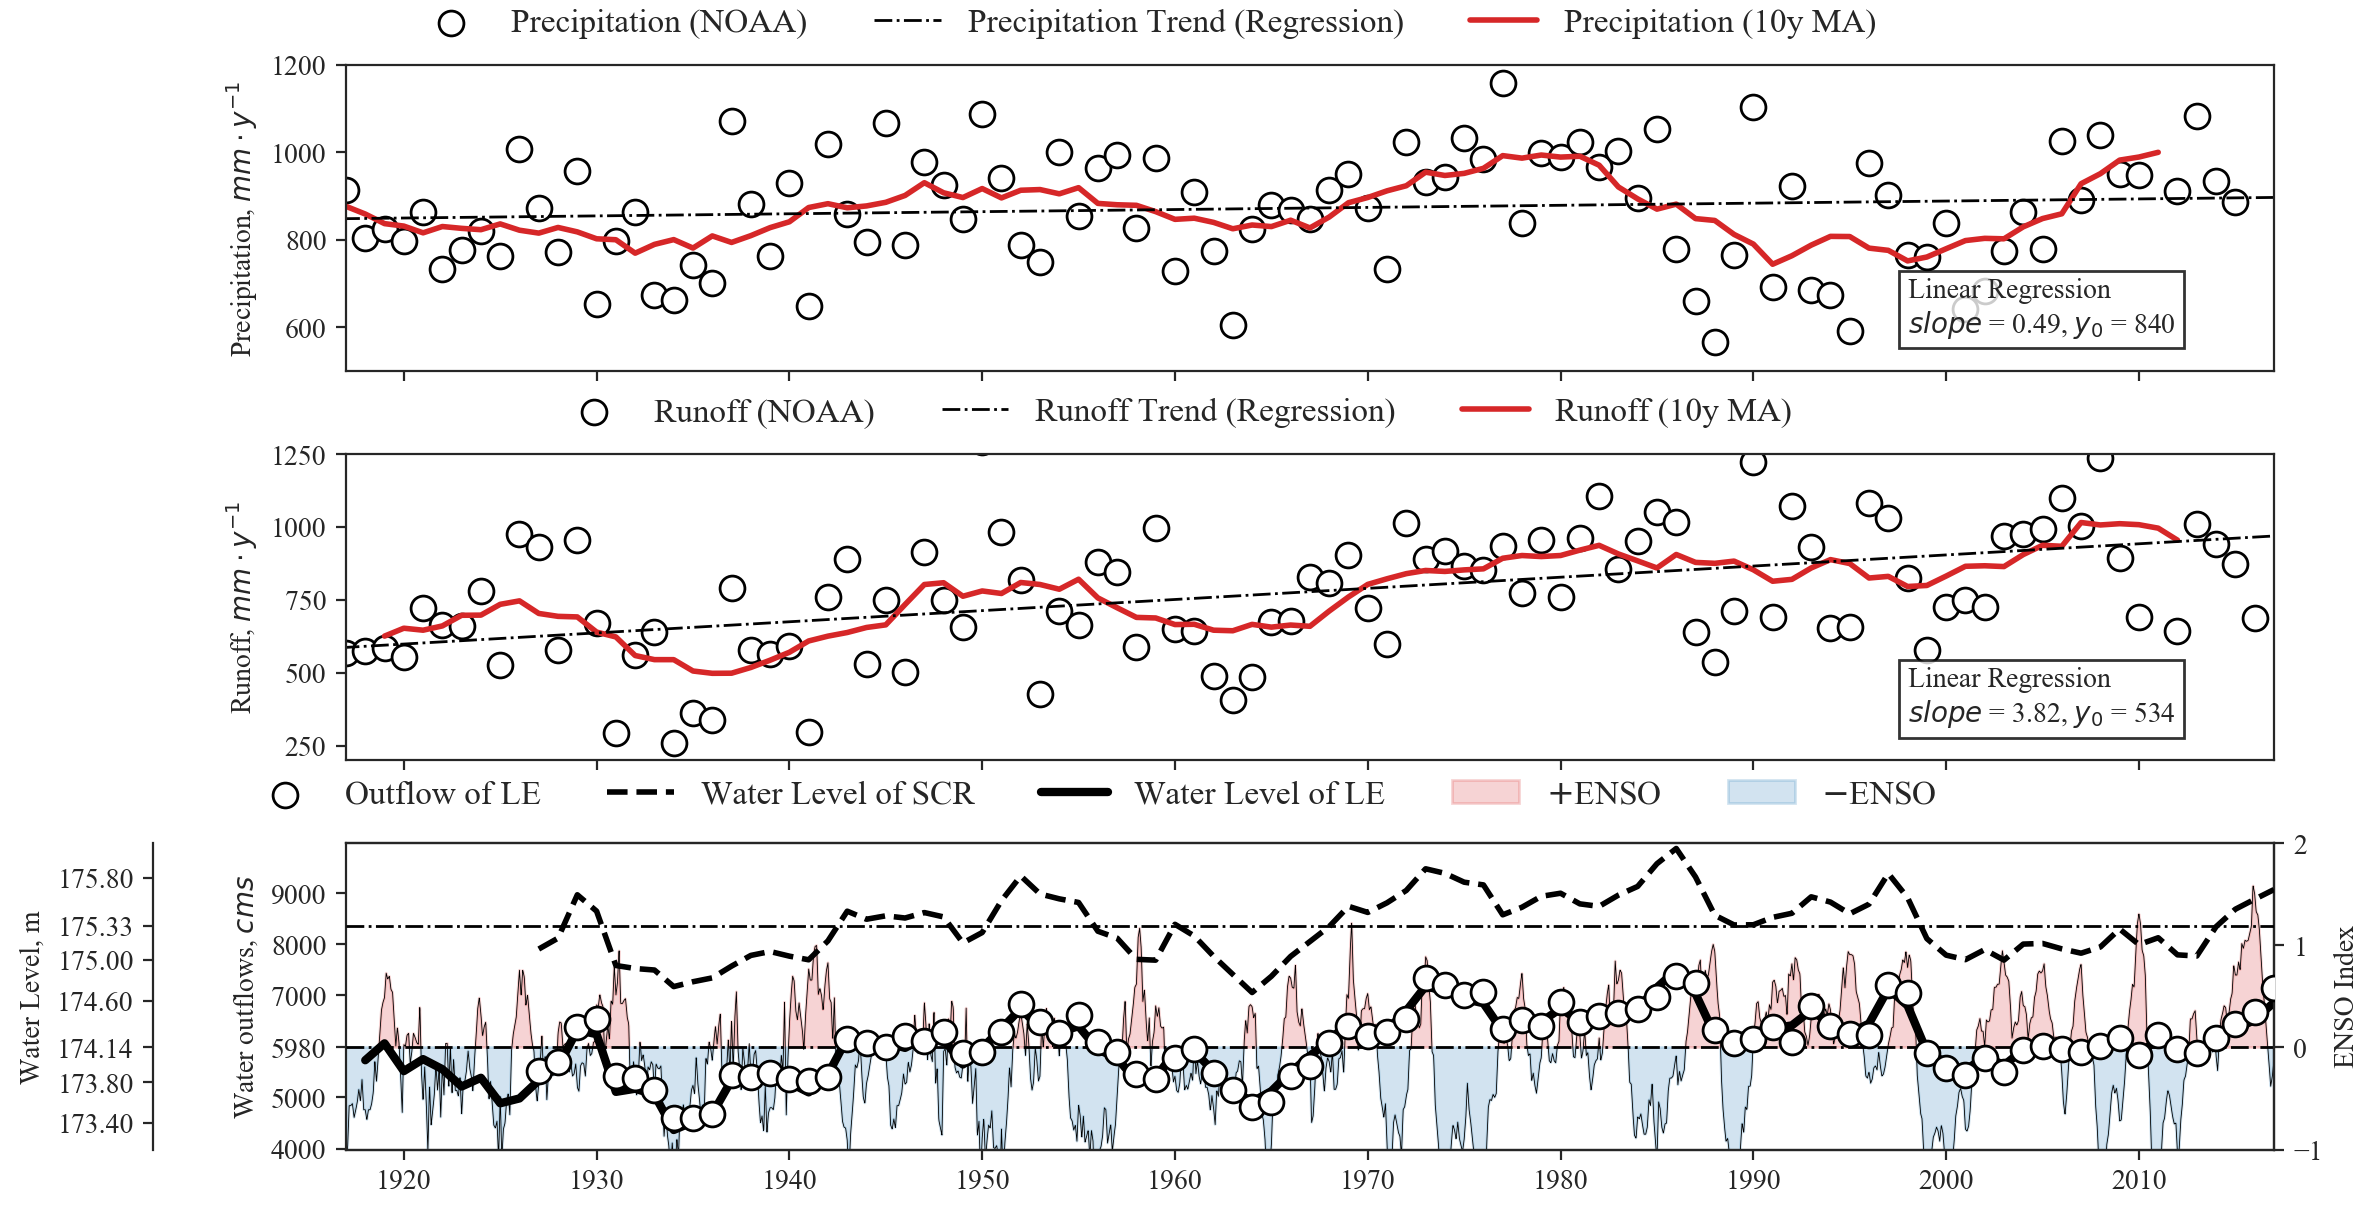

In [91]:
f, axes = plt.subplots(3,1, figsize=(12,6), dpi=200, sharex=True)

ax2 = axes[2].twinx()
ax3 = axes[2].twinx()
# ax4 = axes[2].twinx()

# ax2.spines["left"].set_position(("axes", -0.4)) # red one
ax3.spines["left"].set_position(("axes", -0.1)) # green one
# ax4.spines["right"].set_position(("axes", 1.08)) # red one

ax2.spines["right"].set_visible(True)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3.spines["left"].set_visible(True)
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_ticks_position('left')


# axes[2].scatter(quinn1986.year, quinn1986['Total Water supply m3 s'], label='Quinn (1986)', edgecolor=sns.color_palette()[0], s=100, marker='o', facecolors='white', zorder=2)
# axes[2].scatter(quinn2008.year[quinn2008.year>1980], quinn2008[quinn2008.year>1980]['Total outflow cms'], label='Quinn (2008)', edgecolor=sns.color_palette()[2], s=100, marker='o', facecolors='white', zorder=2)

axes[2].scatter(Niagara_flow['Water Year'][:-14], Niagara_flow['CFS'][:-14]*0.028316847*1.045, label='Outflow of LE', edgecolor='k', s=80, marker='o', facecolors='white', zorder=2)
ax3.plot(stclair_river_level_an.index, stclair_river_level_an.Value, zorder=10, c='k', ls='--', lw=2, label='Water Level of SCR')



# axes[2].plot(np.linspace(2003,2017,15), total_inflows, lw=2, ls='-', c='k', label='Total Inflow')
axes[2].scatter(np.linspace(2004,2017,14), total_outflow[1:-1],edgecolor='k', s=80, marker='o', facecolor='white', zorder=2)

# axes[2].plot(np.linspace(2003,2017,15), st_clair_river_inflow, lw=1, ls='-', c='k', label='St. Clair River')
# axes[2].plot(np.linspace(2003,2017,15), detroit_outflow, lw=1, ls='--', c='k', label='Detroit River')

# axes[2].grid(lw=0.3)


# NAO_w = NAO[['January', 'February', 'March', 'December']].mean(axis=1)
# NAO_w = NAO[NAO.columns[1:]].mean(axis=1)

x = nino4_agg.Year_dec
y = nino4_agg[0]
xvals = np.linspace(1825, 2017, 15000)
yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

ax2.fill_between(xvals, 0, positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$ENSO')
ax2.fill_between(xvals, 0, negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$ENSO')
ax2.plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)


# NAO_w = NAO[['Mean',]].mean(axis=1)
# positive_signal = NAO_w.copy()
# negative_signal = NAO_w.copy()

# positive_signal[positive_signal < 0] = np.nan
# negative_signal[negative_signal > 0] = np.nan

# ax2.fill_between(NAO.Year, 0, positive_signal, zorder=1, alpha=0.4, color=sns.color_palette()[3], label='Annual Average NAO')
# ax2.fill_between(NAO.Year, 0, negative_signal, zorder=1, alpha=0.4, color=sns.color_palette()[0])
# ax2.plot(NAO.Year, NAO_w, zorder=1, c='k', alpha=1, lw=0.3)



# ax2.plot(NAO.Year, movingaverage(NAO.Mean, 5))
# ax2.scatter(NAO.Year, NAO[['December', 'January', 'February', 'March',]].mean(axis=1), marker='x', label='NAO')
# ax2.plot(NAO.Year, movingaverage(NAO[['December', 'January', 'February', 'March',]].mean(axis=1),10), c='k', lw=2, label='NAO - Winter (Dec-Mar, 10y MA)')



# ax2.scatter(PDO.YEAR,PDO[PDO.columns[1:]].mean(axis=1), c='k')
# ax2.plot(PDO.YEAR,movingaverage(PDO[PDO.columns[1:]].mean(axis=1), 10), c=sns.color_palette()[4], lw=2, label='PDO (10y MA)')
ax2.set_ylabel('ENSO Index')
ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
ax2.set_xlim(1900,2017)
ax2.set_ylim(-1,2)
# ax2.legend(loc=4, framealpha=0.8)




# ax4.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, label='Precipitation (NOAA)')
# ax4.plot(Precip_mm.Year[10:], movingaverage(Precip_mm.Total, 10)[10:], c=sns.color_palette()[3], lw=3, label='Precipitation (10 years MA)')



ax3.plot(water_level_2.groupby('year').mean()['Erie'], c='k', lw=3,label='Water Level of LE')

axes[2].set_ylim(3980,9980)
axes[2].set_ylabel('Water outflows, $cms$')
axes[2].set_yticks([4000, 5000, 5980, 7000, 8000, 9000])

ax3.axhline(175.33, c='k', ls='-.', lw=1, zorder=10)
ax3.set_ylabel('Water Level, m')
ax3.set_ylim(174.14-1,175.14+1)
# ax3.legend(loc=(0.5,0.1))
ax3.set_yticks([ 173.4, 173.8, 174.14, 174.6, 175., 175.33, 175.8 ])

# axes[2].legend(loc=3, framealpha=0.8, facecolor='w')
axes[2].set_zorder(1) # make it on top
axes[2].set_frame_on(False) # make it transparent
ax2.set_frame_on(True) # make sure there is any background

# ax4.set_ylim(0,1200)




axes[0].set_xlim(1900,2020)
# axes[0].set_xticks(np.linspace(2000,2017,18)[::2])
#     ax.set_ylim(0,15)
axes[0].set_xlabel('')
# axes[0].grid(lw=0.2)

# axes[0].plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, )
axes[0].scatter(Precip_mm.Year, Precip_mm.Total,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Precipitation (NOAA)')


axes[0].plot(Precip_mm.Year[5:], movingaverage(Precip_mm.Total, 10)[5:], c=sns.color_palette()[3], lw=2, label='Precipitation (10y MA)')
# axes[0].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Runoff (GLERL, model)')
x = np.linspace(1900,2020, 121)
axes[0].plot(x, 840.5+0.485*(x-1900), 'k-.', lw=1, label='Precipitation Trend (Regression)')
# axes[0].legend(loc=2)
# axes[0].legend(loc=3,fontsize='small')
axes[0].set_ylim(500,1200)
axes[0].set_xlim(1900,2017)
# axes[0].set_ylim(0,8)
# axes[0].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[0].set_ylabel('Precipitation, $mm\cdot y^{-1}$')
plt.tight_layout()






# axes[1].plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2, label='Wind Speed GLERL')
# axes[1].plot(df.YY, df.WSPD, c=sns.color_palette()[0], lw=1, ls=':', label='Bouy 45005')
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes[1].plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
axes[2].set_xlim(1917,2017)
axes[2].set_xticks(np.arange(1920,2020,10))
#     ax.set_ylim(0,15)
axes[1].set_xlabel('')
# axes[1].grid(lw=0.2)

# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, 
#           c=sns.color_palette()[0], lw=1, label='Runoff (NOAA)')
axes[1].scatter(Runoff_mm.YEAR, Runoff_mm.Ann,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Runoff (NOAA)')
axes[1].plot(Runoff_mm.YEAR, movingaverage(Runoff_mm.Ann, 10),
          c=sns.color_palette()[3], lw=2, label='Runoff (10y MA)')
# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Evaporat (GLERL, model)')
# axes[1].plot(Evap_mm.set_index('Year')[:-7].Ann.index, Evap_mm.set_index('Year')[:-7].Ann.values)
x = np.linspace(1900,2020, 121)
axes[1].plot(x, 576+3.82*(x-1914), 'k-.', lw=1, label='Runoff Trend (Regression)')
# axes[1].legend(loc=2)
# axes[1].legend(loc=3,fontsize='small')
axes[1].set_ylim(200,1250)
# axes[1].set_ylim(0,8)
# axes[1].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[1].set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()

# axes[1].set_xlim(1917,2017)

text = 'Linear Regression\n$slope$ = 0.49, $y_0$ = 840'

props = dict(boxstyle='square', facecolor='white', alpha=0.8, edgecolor='black')
axes[0].text(0.81, 0.3, text, transform=axes[0].transAxes,
        verticalalignment='top', bbox=props)


text = 'Linear Regression\n$slope$ = 3.82, $y_0$ = 534'

props = dict(boxstyle='square', facecolor='white', alpha=0.8, edgecolor='black')
axes[1].text(0.81, 0.3, text, transform=axes[1].transAxes,
        verticalalignment='top', bbox=props)



handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles, labels = axes[2].get_legend_handles_labels()
f.legend( handles + handles3 + handles2, labels + labels3 + labels2, loc = (0.1, 0.322), ncol=6, frameon=0, framealpha=0.5, fontsize='large')
plt.tight_layout(h_pad=2.5)


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.23, 0.637), ncol=3, frameon=0, framealpha=0.5, fontsize='large')


handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.17, 0.957), ncol=3, frameon=0, framealpha=1, fontsize='large')

# ax2 = axes[1].twinx()
# ax2.plot(wl_lake_erie_annual.index, wl_lake_erie_annual.values, lw=1)
# ax2.set_ylim(173,175)


# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precip_runoff_el_nino.pdf', dpi=f.dpi)


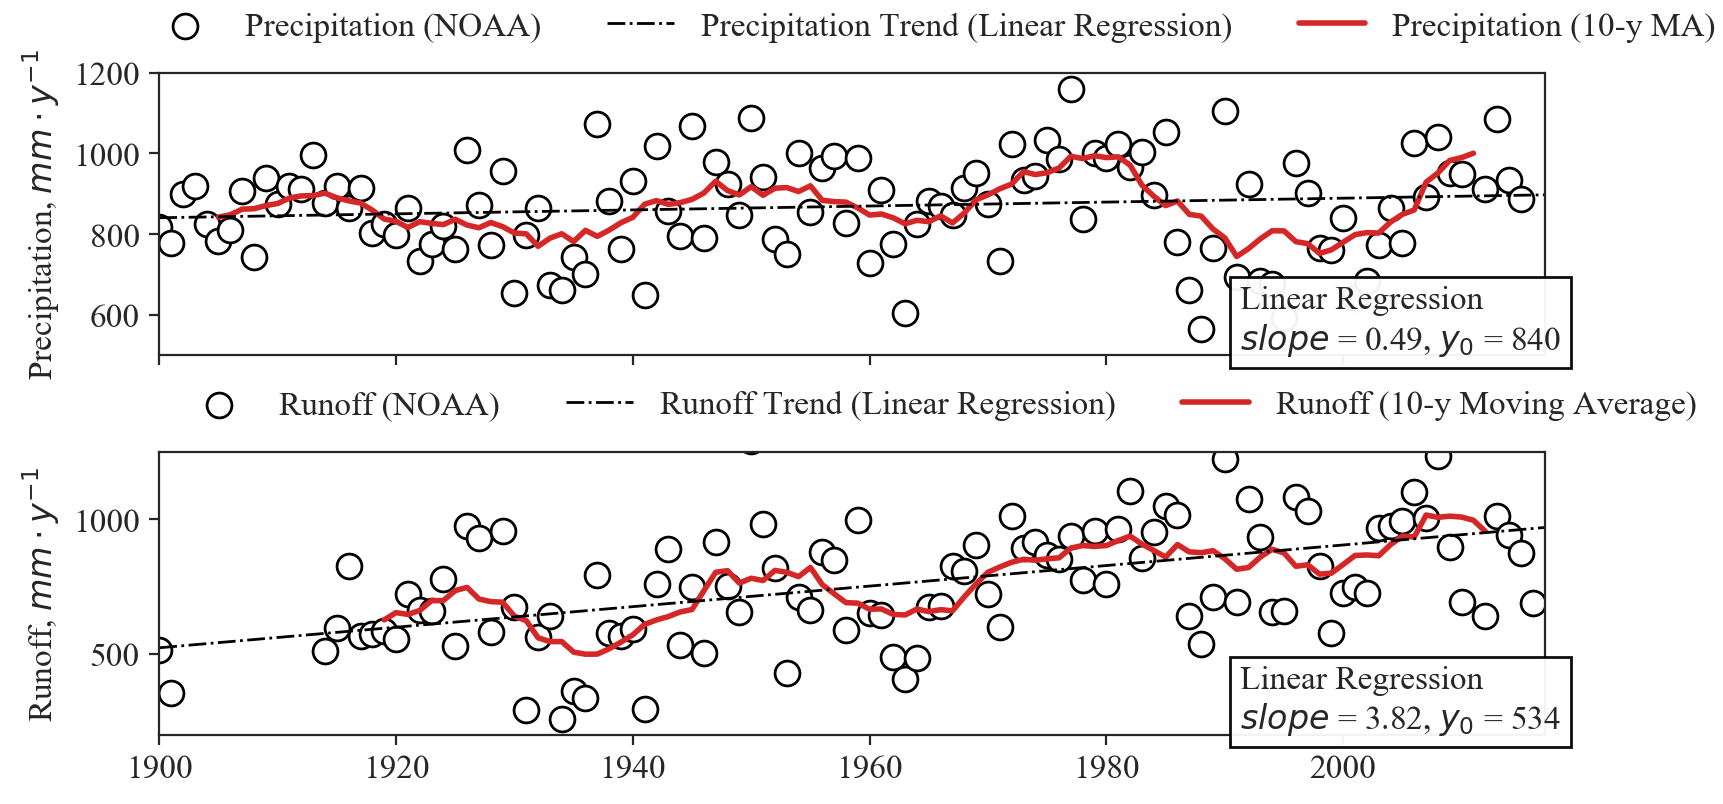

In [46]:
f, axes = plt.subplots(2,1, figsize=(8,4), dpi=200, sharex=True)

# ax2 = axes[2].twinx()
# ax3 = axes[2].twinx()
# ax4 = axes[2].twinx()

# ax2.spines["left"].set_position(("axes", -0.4)) # red one
# ax3.spines["left"].set_position(("axes", -0.08)) # green one
# # ax4.spines["right"].set_position(("axes", 1.08)) # red one

# ax2.spines["right"].set_visible(True)
# ax2.yaxis.set_label_position('right')
# ax2.yaxis.set_ticks_position('right')

# ax3.spines["left"].set_visible(True)
# ax3.yaxis.set_label_position('left')
# ax3.yaxis.set_ticks_position('left')


# axes[2].scatter(quinn1986.year, quinn1986['Total Water supply m3 s'], label='Quinn (1986)', edgecolor=sns.color_palette()[0], s=100, marker='o', facecolors='white', zorder=2)
# axes[2].scatter(quinn2008.year[quinn2008.year>1980], quinn2008[quinn2008.year>1980]['Total outflow cms'], label='Quinn (2008)', edgecolor=sns.color_palette()[2], s=100, marker='o', facecolors='white', zorder=2)

# axes[2].scatter(Niagara_flow['Water Year'][:-14], Niagara_flow['CFS'][:-14]*0.028316847*1.045, label='Lake Erie Outflow', edgecolor='k', s=80, marker='o', facecolors='white', zorder=2)
# ax3.plot(stclair_river_level_an.index, stclair_river_level_an.Value, zorder=10, c='k', ls='--', lw=2, label='Water Level of St. Clair River')



# axes[2].plot(np.linspace(2003,2017,15), total_inflows, lw=2, ls='-', c='k', label='Total Inflow')
# axes[2].scatter(np.linspace(2004,2017,14), total_outflow[1:],edgecolor='k', s=80, marker='o', facecolor='white', zorder=2)

# axes[2].plot(np.linspace(2003,2017,15), st_clair_river_inflow, lw=1, ls='-', c='k', label='St. Clair River')
# axes[2].plot(np.linspace(2003,2017,15), detroit_outflow, lw=1, ls='--', c='k', label='Detroit River')

# axes[2].grid(lw=0.3)


# NAO_w = NAO[['January', 'February', 'March', 'December']].mean(axis=1)
# NAO_w = NAO[NAO.columns[1:]].mean(axis=1)

# x = nino4_agg.Year_dec
# y = nino4_agg[0]
# xvals = np.linspace(1825, 2017, 15000)
# yinterp = np.interp(xvals, x, y)


# positive_signal = yinterp.copy()
# negative_signal = yinterp.copy()

# positive_signal[positive_signal < 0] = np.nan
# negative_signal[negative_signal > 0] = np.nan

# ax2.fill_between(xvals, 0, positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$ENSO')
# ax2.fill_between(xvals, 0, negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$ENSO')
# ax2.plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)


# NAO_w = NAO[['Mean',]].mean(axis=1)
# positive_signal = NAO_w.copy()
# negative_signal = NAO_w.copy()

# positive_signal[positive_signal < 0] = np.nan
# negative_signal[negative_signal > 0] = np.nan

# ax2.fill_between(NAO.Year, 0, positive_signal, zorder=1, alpha=0.4, color=sns.color_palette()[3], label='Annual Average NAO')
# ax2.fill_between(NAO.Year, 0, negative_signal, zorder=1, alpha=0.4, color=sns.color_palette()[0])
# ax2.plot(NAO.Year, NAO_w, zorder=1, c='k', alpha=1, lw=0.3)



# ax2.plot(NAO.Year, movingaverage(NAO.Mean, 5))
# ax2.scatter(NAO.Year, NAO[['December', 'January', 'February', 'March',]].mean(axis=1), marker='x', label='NAO')
# ax2.plot(NAO.Year, movingaverage(NAO[['December', 'January', 'February', 'March',]].mean(axis=1),10), c='k', lw=2, label='NAO - Winter (Dec-Mar, 10y MA)')



# ax2.scatter(PDO.YEAR,PDO[PDO.columns[1:]].mean(axis=1), c='k')
# # ax2.plot(PDO.YEAR,movingaverage(PDO[PDO.columns[1:]].mean(axis=1), 10), c=sns.color_palette()[4], lw=2, label='PDO (10y MA)')
# ax2.set_ylabel('El Niño-Southern Oscillation Index')
# ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
# ax2.set_xlim(1900,2017)
# ax2.set_ylim(-1,2)
# ax2.legend(loc=4, framealpha=0.8)




# ax4.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, label='Precipitation (NOAA)')
# ax4.plot(Precip_mm.Year[10:], movingaverage(Precip_mm.Total, 10)[10:], c=sns.color_palette()[3], lw=3, label='Precipitation (10 years MA)')



# ax3.plot(water_level_2.groupby('year').mean()['Erie'], c='k', lw=3,label='Water Level of LE')

# axes[2].set_ylim(3980,9980)
# axes[2].set_ylabel('Water outflows, $cms$')
# axes[2].set_yticks([4000, 5000, 5980, 7000, 8000, 9000])

# ax3.axhline(175.33, c='k', ls='-.', lw=1, zorder=10)
# ax3.set_ylabel('Water Level, m')
# ax3.set_ylim(174.14-1,175.14+1)
# # ax3.legend(loc=(0.5,0.1))
# ax3.set_yticks([ 173.4, 173.8, 174.14, 174.6, 175., 175.33, 175.8 ])

# # axes[2].legend(loc=3, framealpha=0.8, facecolor='w')
# axes[2].set_zorder(1) # make it on top
# axes[2].set_frame_on(False) # make it transparent
# ax2.set_frame_on(True) # make sure there is any background

# # ax4.set_ylim(0,1200)




axes[0].set_xlim(1900,2020)
# axes[0].set_xticks(np.linspace(2000,2017,18)[::2])
#     ax.set_ylim(0,15)
axes[0].set_xlabel('')
# axes[0].grid(lw=0.2)

# axes[0].plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, )
axes[0].scatter(Precip_mm.Year, Precip_mm.Total,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Precipitation (NOAA)')


axes[0].plot(Precip_mm.Year[5:], movingaverage(Precip_mm.Total, 10)[5:], c=sns.color_palette()[3], lw=2, label='Precipitation (10-y MA)')
# axes[0].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Runoff (GLERL, model)')
x = np.linspace(1900,2020, 121)
axes[0].plot(x, 840.5+0.485*(x-1900), 'k-.', lw=1, label='Precipitation Trend (Linear Regression)')
# axes[0].legend(loc=2)
# axes[0].legend(loc=3,fontsize='small')
axes[0].set_ylim(500,1200)
axes[0].set_xlim(1900,2017)
# axes[0].set_ylim(0,8)
# axes[0].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[0].set_ylabel('Precipitation, $mm\cdot y^{-1}$')
plt.tight_layout()






# axes[1].plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2, label='Wind Speed GLERL')
# axes[1].plot(df.YY, df.WSPD, c=sns.color_palette()[0], lw=1, ls=':', label='Bouy 45005')
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes[1].plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
axes[1].set_xlim(1900,2017)
# axes[1].set_xticks(np.linspace(2000,2017,18)[::2])
#     ax.set_ylim(0,15)
axes[1].set_xlabel('')
# axes[1].grid(lw=0.2)

# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, 
#           c=sns.color_palette()[0], lw=1, label='Runoff (NOAA)')
axes[1].scatter(Runoff_mm.YEAR, Runoff_mm.Ann,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Runoff (NOAA)')
axes[1].plot(Runoff_mm.YEAR, movingaverage(Runoff_mm.Ann, 10),
          c=sns.color_palette()[3], lw=2, label='Runoff (10-y Moving Average)')
# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Evaporat (GLERL, model)')
# axes[1].plot(Evap_mm.set_index('Year')[:-7].Ann.index, Evap_mm.set_index('Year')[:-7].Ann.values)
x = np.linspace(1900,2020, 121)
axes[1].plot(x, 576+3.82*(x-1914), 'k-.', lw=1, label='Runoff Trend (Linear Regression)')
# axes[1].legend(loc=2)
# axes[1].legend(loc=3,fontsize='small')
axes[1].set_ylim(200,1250)
# axes[1].set_ylim(0,8)
# axes[1].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[1].set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()



text = 'Linear Regression\n$slope$ = 0.49, $y_0$ = 840'

props = dict(boxstyle='square', facecolor='white', alpha=0.95, edgecolor='black')
axes[0].text(0.78, 0.24, text, transform=axes[0].transAxes,
        verticalalignment='top', bbox=props)


text = 'Linear Regression\n$slope$ = 3.82, $y_0$ = 534'

props = dict(boxstyle='square', facecolor='white', alpha=0.95, edgecolor='black')
axes[1].text(0.78, 0.24, text, transform=axes[1].transAxes,
        verticalalignment='top', bbox=props)



# handles2, labels2 = ax2.get_legend_handles_labels()
# handles3, labels3 = ax3.get_legend_handles_labels()
# handles, labels = axes[2].get_legend_handles_labels()
# f.legend( handles + handles3 + handles2, labels + labels3 + labels2, loc = (0.13, 0.32), ncol=6, frameon=0, framealpha=0.5, fontsize='large')
plt.tight_layout(h_pad=2.3)


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.1, 0.46), ncol=3, frameon=0, framealpha=1)


handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.08, 0.93), ncol=3, frameon=0, framealpha=1)

# ax2 = axes[1].twinx()
# ax2.plot(wl_lake_erie_annual.index, wl_lake_erie_annual.values, lw=1)
# ax2.set_ylim(173,175)


# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precip_and_runoff.pdf', dpi=f.dpi)


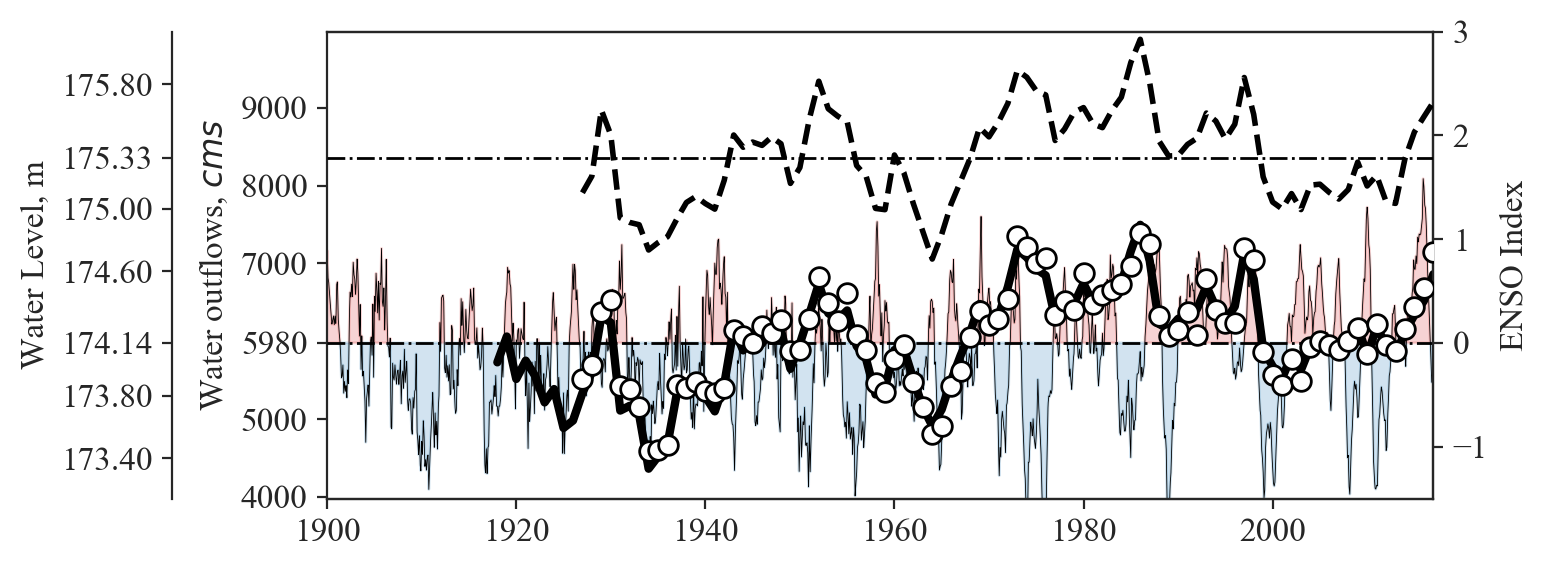

In [48]:
f, axes = plt.subplots(1,1, figsize=(8,3), dpi=200, sharex=True)

ax2 = axes.twinx()
ax3 = axes.twinx()
# ax4 = axes.twinx()

# ax2.spines["left"].set_position(("axes", -0.4)) # red one
ax3.spines["left"].set_position(("axes", -0.14)) # green one
# ax4.spines["right"].set_position(("axes", 1.08)) # red one

ax2.spines["right"].set_visible(True)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3.spines["left"].set_visible(True)
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_ticks_position('left')


# axes.scatter(quinn1986.year, quinn1986['Total Water supply m3 s'], label='Quinn (1986)', edgecolor=sns.color_palette()[0], s=100, marker='o', facecolors='white', zorder=2)
# axes.scatter(quinn2008.year[quinn2008.year>1980], quinn2008[quinn2008.year>1980]['Total outflow cms'], label='Quinn (2008)', edgecolor=sns.color_palette()[2], s=100, marker='o', facecolors='white', zorder=2)

axes.scatter(Niagara_flow['Water Year'][:-14], Niagara_flow['CFS'][:-14]*0.028316847*1.045, label='Lake Erie Outflow', edgecolor='k', s=50, marker='o', facecolors='white', zorder=2)
ax3.plot(stclair_river_level_an.index, stclair_river_level_an.Value, zorder=10, c='k', ls='--', lw=2, label='Water Level of St. Clair River')



# axes.plot(np.linspace(2003,2017,15), total_inflows, lw=2, ls='-', c='k', label='Total Inflow')
axes.scatter(np.linspace(2004,2017,14), total_outflow[1:-1],edgecolor='k', s=50, marker='o', facecolor='white', zorder=2)

# axes.plot(np.linspace(2003,2017,15), st_clair_river_inflow, lw=1, ls='-', c='k', label='St. Clair River')
# axes.plot(np.linspace(2003,2017,15), detroit_outflow, lw=1, ls='--', c='k', label='Detroit River')

# axes.grid(lw=0.3)


# NAO_w = NAO[['January', 'February', 'March', 'December']].mean(axis=1)
# NAO_w = NAO[NAO.columns[1:]].mean(axis=1)

x = nino4_agg.Year_dec
y = nino4_agg[0]
xvals = np.linspace(1825, 2017, 15000)
yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

ax2.fill_between(xvals, 0, positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$ENSO')
ax2.fill_between(xvals, 0, negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$ENSO')
ax2.plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)


# NAO_w = NAO[['Mean',]].mean(axis=1)
# positive_signal = NAO_w.copy()
# negative_signal = NAO_w.copy()

# positive_signal[positive_signal < 0] = np.nan
# negative_signal[negative_signal > 0] = np.nan

# ax2.fill_between(NAO.Year, 0, positive_signal, zorder=1, alpha=0.4, color=sns.color_palette()[3], label='Annual Average NAO')
# ax2.fill_between(NAO.Year, 0, negative_signal, zorder=1, alpha=0.4, color=sns.color_palette()[0])
# ax2.plot(NAO.Year, NAO_w, zorder=1, c='k', alpha=1, lw=0.3)



# ax2.plot(NAO.Year, movingaverage(NAO.Mean, 5))
# ax2.scatter(NAO.Year, NAO[['December', 'January', 'February', 'March',]].mean(axis=1), marker='x', label='NAO')
# ax2.plot(NAO.Year, movingaverage(NAO[['December', 'January', 'February', 'March',]].mean(axis=1),10), c='k', lw=2, label='NAO - Winter (Dec-Mar, 10y MA)')



# ax2.scatter(PDO.YEAR,PDO[PDO.columns[1:]].mean(axis=1), c='k')
# ax2.plot(PDO.YEAR,movingaverage(PDO[PDO.columns[1:]].mean(axis=1), 10), c=sns.color_palette()[4], lw=2, label='PDO (10y MA)')
ax2.set_ylabel('ENSO Index')
ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
ax2.set_xlim(1900,2017)
ax2.set_ylim(-1.5,3)
# ax2.legend(loc=4, framealpha=0.8)




# ax4.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, label='Precipitation (NOAA)')
# ax4.plot(Precip_mm.Year[10:], movingaverage(Precip_mm.Total, 10)[10:], c=sns.color_palette()[3], lw=3, label='Precipitation (10 years MA)')



ax3.plot(water_level_2.groupby('year').mean()['Erie'], c='k', lw=3,label='Water Level of LE')

axes.set_ylim(3980,9980)
axes.set_ylabel('Water outflows, $cms$')
axes.set_yticks([4000, 5000, 5980, 7000, 8000, 9000])

ax3.axhline(175.33, c='k', ls='-.', lw=1, zorder=10)
ax3.set_ylabel('Water Level, m')
ax3.set_ylim(174.14-1,175.14+1)
# ax3.legend(loc=(0.5,0.1))
ax3.set_yticks([ 173.4, 173.8, 174.14, 174.6, 175., 175.33, 175.8 ])

# axes.legend(loc=3, framealpha=0.8, facecolor='w')
axes.set_zorder(1) # make it on top
axes.set_frame_on(False) # make it transparent
ax2.set_frame_on(True) # make sure there is any background

# ax4.set_ylim(0,1200)




handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles, labels = axes.get_legend_handles_labels()
# f.legend( handles + handles3 + handles2, labels + labels3 + labels2, loc = (0.07, 0.93), ncol=6, frameon=0, framealpha=0.5, fontsize='small')
plt.tight_layout()


# handles, labels = axes[1].get_legend_handles_labels()
# f.legend( handles[::-1] , labels[::-1] , loc = (0.2, 0.637), ncol=3, frameon=0, framealpha=0.5, fontsize='large')


# handles, labels = axes[0].get_legend_handles_labels()
# f.legend( handles[::-1] , labels[::-1] , loc = (0.14, 0.957), ncol=3, frameon=0, framealpha=1, fontsize='large')

# ax2 = axes[1].twinx()
# ax2.plot(wl_lake_erie_annual.index, wl_lake_erie_annual.values, lw=1)
# ax2.set_ylim(173,175)


# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/wl_el_nino.pdf', dpi=f.dpi)


In [49]:
np.sort(np.concatenate([quinn1986['Total Water supply m3 s'].values, quinn2008[quinn2008.year>1980].values[:,1], total_outflow[1:]]))


array([4829, 4833, 5094, 5255, 5282, 5368, 5453.085, 5617, 5702, 5718,
       5763.815, 5765.695, 5817.7480000000005, 5831.472191780822,
       5866.626, 5871.076999999999, 5877.30904109589, 5882.891917808219,
       5921, 5929.889613140538, 5942, 5956.643150684931,
       5957.328020674785, 5959, 5961, 5994, 6002.7541070522575,
       6009.7520547945205, 6040, 6063.29, 6120.7880000000005,
       6123.672706377896, 6153, 6158.686027397261, 6160,
       6174.890684931506, 6189, 6227.627397260274, 6231.065,
       6265.6140000000005, 6272, 6296, 6296, 6312.3009999999995, 6329,
       6340, 6367, 6371.401999999999, 6440, 6446.9628767123295, 6447.273,
       6537, 6541, 6561.3240000000005, 6574.6140000000005, 6582, 6645,
       6676.15, 6681.118991787163, 6684, 6708.608, 6731.5509999999995,
       6819, 6852.815, 6891.37, 6915.645, 6950, 7005.929,
       7021.111999999999, 7058, 7123, 7124, 7125.566999999999,
       7151.2642465753415, 7435.103, 7531.217], dtype=object)

# PDO

In [66]:
PDO = pd.read_excel('../../measurements/Oscillations/pdo.xlsx', sheet_name='Data')

import datetime as datetime

for c in PDO.columns:
    PDO[c] = pd.to_numeric(PDO[c], errors='coerce')


PDO_agg = PDO.groupby('YEAR').mean()[PDO.columns[1:-1]].stack().reset_index()

PDO_agg['M_n'] = PDO_agg['level_1'].apply(lambda x: datetime.datetime.strptime(x, '%b').month)

PDO_agg['Year_dec']= PDO_agg['YEAR'] + PDO_agg['M_n']/12

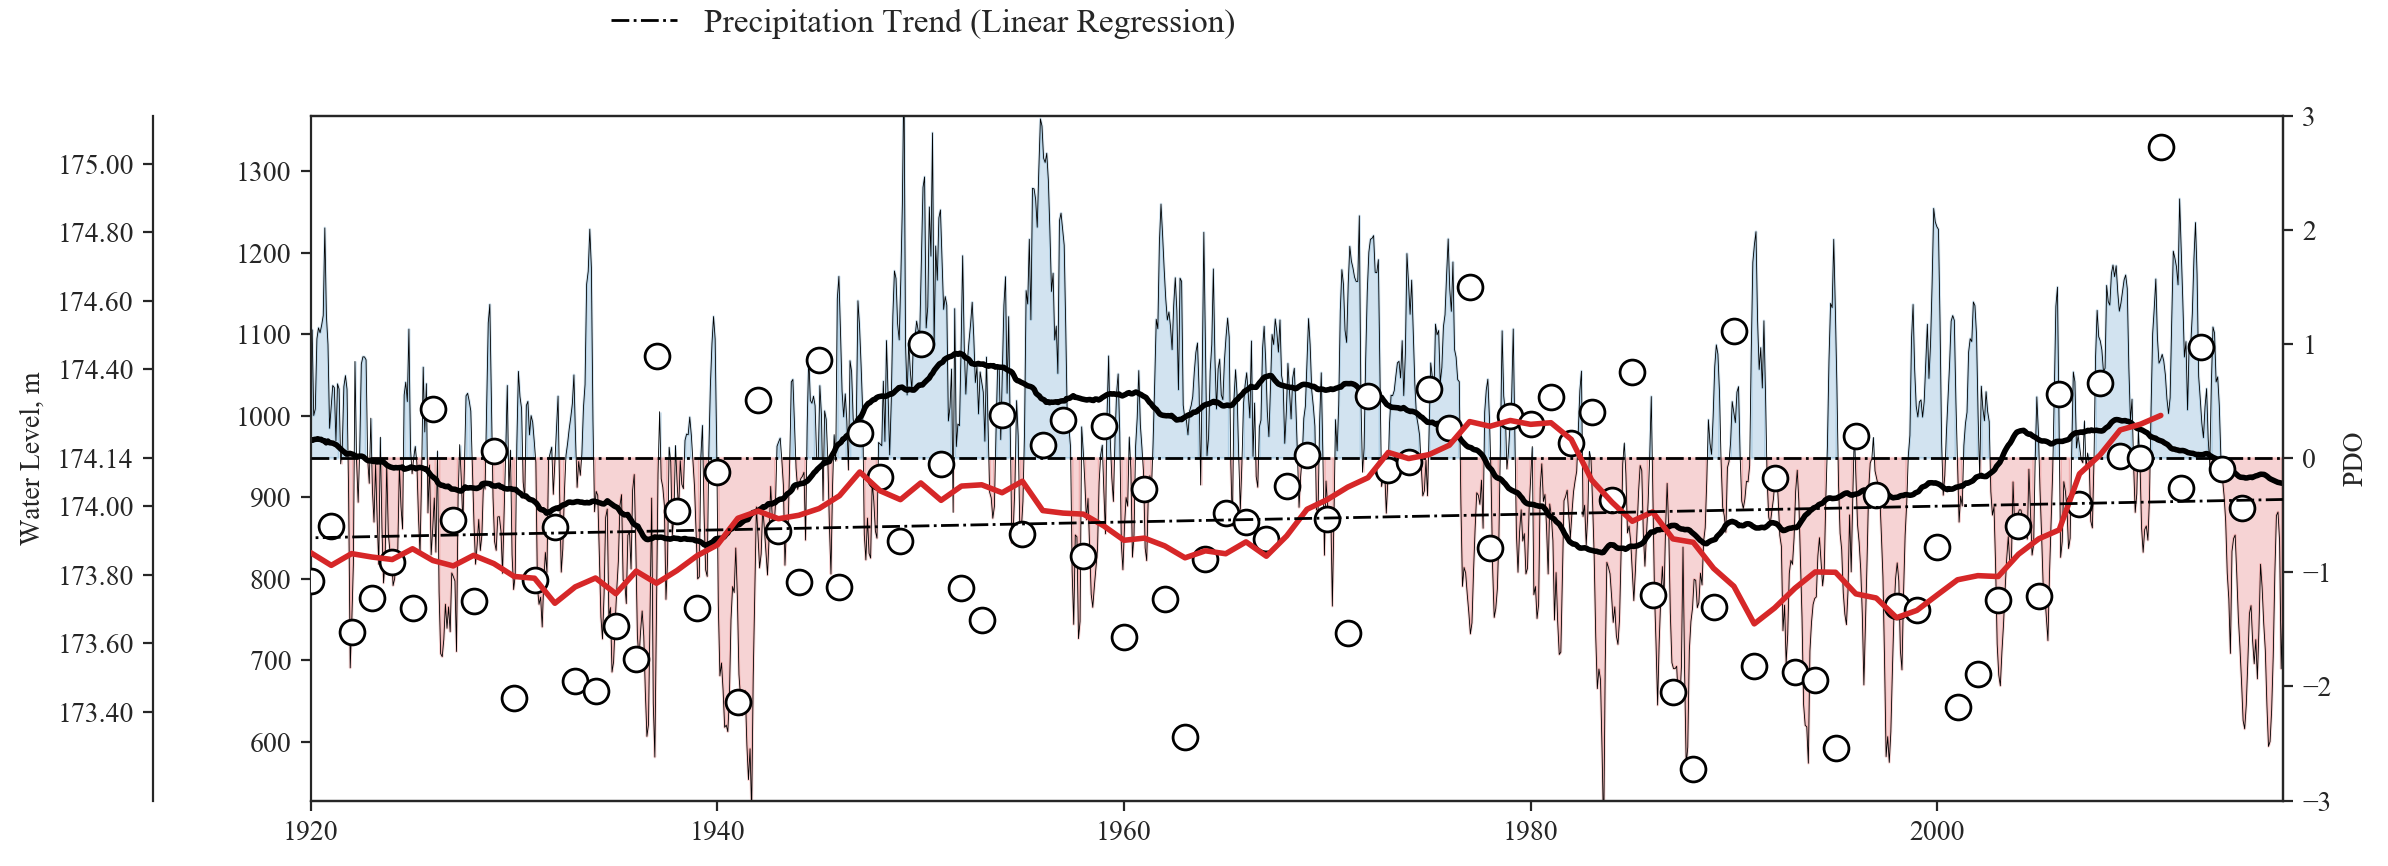

In [86]:
f, axes = plt.subplots(1,1, figsize=(12,4), dpi=200, sharex=True)

ax2 = axes.twinx()
ax3 = axes.twinx()

# ax2.spines["left"].set_position(("axes", -0.4)) # red one
ax3.spines["left"].set_position(("axes", -0.08)) # green one

ax2.spines["right"].set_visible(True)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3.spines["left"].set_visible(True)
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_ticks_position('left')


# axes.scatter(quinn1986.year, quinn1986['Total Water supply m3 s'], label='Quinn (1986)', edgecolor=sns.color_palette()[0], s=100, marker='o', facecolors='white', zorder=2)
# axes.scatter(quinn2008.year[quinn2008.year>1980], quinn2008[quinn2008.year>1980]['Total outflow cms'], label='Quinn (2008)', edgecolor=sns.color_palette()[2], s=100, marker='o', facecolors='white', zorder=2)

# axes.scatter(Niagara_flow['Water Year'][:-14], Niagara_flow['CFS'][:-14]*0.028316847*1.03, label='Lake Erie Outflow', edgecolor='k', s=130, marker='o', facecolors='white', zorder=2)
# axes.scatter(Niagara_flow['Water Year'], Niagara_flow['CFS']*0.028316847*1.045, zorder=10)



# axes.plot(np.linspace(2003,2017,15), total_inflows, lw=2, ls='-', c='k', label='Total Inflow')
# axes.scatter(np.linspace(2004,2017,14), total_outflow[1:-1],edgecolor='k', s=130, marker='o', facecolor='white', zorder=2)

# axes.plot(np.linspace(2003,2017,15), st_clair_river_inflow, lw=1, ls='-', c='k', label='St. Clair River')
# axes.plot(np.linspace(2003,2017,15), detroit_outflow, lw=1, ls='--', c='k', label='Detroit River')

# axes.grid(lw=0.3)



axes.scatter(Precip_mm.Year, Precip_mm.Total,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Precipitation (NOAA)')


axes.plot(Precip_mm.Year[5:], movingaverage(Precip_mm.Total, 10)[5:], c=sns.color_palette()[3], lw=2, label='Precipitation (10-y MA)')
# axes[0].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Runoff (GLERL, model)')
x = np.linspace(1900,2020, 121)
axes.plot(x, 840.5+0.485*(x-1900), 'k-.', lw=1, label='Precipitation Trend (Linear Regression)')



# NAO_w = NAO[NAO.columns[1:]].mean(axis=1)

x = PDO_agg.Year_dec
y = PDO_agg[0]
xvals = np.linspace(1900, 2017, 1500)
yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

ax2.fill_between(xvals, 0, -positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$PDO')
ax2.fill_between(xvals, 0, -negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$PDO')
ax2.plot(xvals, -yinterp, zorder=1, c='k', alpha=1, lw=0.3)


ax2.plot(PDO_agg.Year_dec, -movingaverage(PDO_agg[0], 120), lw=2, c='k')


# ax2.scatter(NAO.Year, NAO[['December', 'January', 'February', 'March',]].mean(axis=1), marker='x', label='NAO')
# ax2.plot(NAO.Year, movingaverage(NAO[['December', 'January', 'February', 'March',]].mean(axis=1),10), c='k', lw=2, label='NAO - Winter (Dec-Mar, 10y MA)')



# ax2.scatter(PDO.YEAR,PDO[PDO.columns[1:]].mean(axis=1), c='k')
# ax2.plot(PDO.YEAR,movingaverage(PDO[PDO.columns[1:]].mean(axis=1), 10), c=sns.color_palette()[4], lw=2, label='PDO (10y MA)')
ax2.set_ylabel('PDO')
ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
ax2.set_xlim(1920,2017)
ax2.set_ylim(-3,3)
# ax2.legend(loc=4, framealpha=0.8)


# ax3.plot(water_level_2.groupby('year').mean()['Erie'], c='k', lw=3,label='Water Level')

# axes.set_ylim(3980,7980)
# axes.set_ylabel('Water outflows, $cms$')
# axes.set_yticks([4500,5000, 5500, 5980, 6500, 7000, 7500])


ax3.set_ylabel('Water Level, m')
ax3.set_ylim(174.14-1,174.14+1)
# ax3.legend(loc=(0.5,0.1))
ax3.set_yticks([ 173.4, 173.6, 173.8, 174. , 174.14, 174.4, 174.6, 174.8, 175. ])

# axes.legend(loc=3, framealpha=0.8, facecolor='w')
axes.set_zorder(1) # make it on top
axes.set_frame_on(False) # make it transparent
ax2.set_frame_on(True) # make sure there is any background



handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles, labels = axes.get_legend_handles_labels()
f.legend( handles + handles3 + handles2, labels + labels3 + labels2, loc = (0.25, 0.94), ncol=4, frameon=0, framealpha=0.5, fontsize='large')
plt.tight_layout()

# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/previous_and_nao.pdf', dpi=f.dpi)


In [129]:
f, axes = plt.subplots(4,1, figsize=(12,8), dpi=200, sharex=True)

ax2 = axes[3].twinx()
ax3 = axes[3].twinx()
# ax4 = axes[3].twinx()

# ax2.spines["left"].set_position(("axes", -0.4)) # red one
ax3.spines["left"].set_position(("axes", -0.1)) # green one
# ax4.spines["right"].set_position(("axes", 1.08)) # red one

ax2.spines["right"].set_visible(True)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')

ax3.spines["left"].set_visible(True)
ax3.yaxis.set_label_position('left')
ax3.yaxis.set_ticks_position('left')


# axes[3].scatter(quinn1986.year, quinn1986['Total Water supply m3 s'], label='Quinn (1986)', edgecolor=sns.color_palette()[0], s=100, marker='o', facecolors='white', zorder=2)
# axes[3].scatter(quinn2008.year[quinn2008.year>1980], quinn2008[quinn2008.year>1980]['Total outflow cms'], label='Quinn (2008)', edgecolor=sns.color_palette()[2], s=100, marker='o', facecolors='white', zorder=2)

axes[3].scatter(Niagara_flow['Water Year'][:-14], Niagara_flow['CFS'][:-14]*0.028316847*1.045, label='Outflow of LE', edgecolor='k', s=80, marker='o', facecolors='white', zorder=2)
ax3.plot(stclair_river_level_an.index, stclair_river_level_an.Value, zorder=10, c='k', ls='--', lw=2, label='Water Level of SCR')



# axes[3].plot(np.linspace(2003,2017,15), total_inflows, lw=2, ls='-', c='k', label='Total Inflow')
axes[3].scatter(np.linspace(2004,2017,14), total_outflow[1:-1],edgecolor='k', s=80, marker='o', facecolor='white', zorder=2)

# axes[3].plot(np.linspace(2003,2017,15), st_clair_river_inflow, lw=1, ls='-', c='k', label='St. Clair River')
# axes[3].plot(np.linspace(2003,2017,15), detroit_outflow, lw=1, ls='--', c='k', label='Detroit River')

# axes[3].grid(lw=0.3)


# NAO_w = NAO[['January', 'February', 'March', 'December']].mean(axis=1)
# NAO_w = NAO[NAO.columns[1:]].mean(axis=1)

x = nino4_agg.Year_dec
y = nino4_agg[0]
xvals = np.linspace(1825, 2017, 15000)
yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

ax2.fill_between(xvals, 0, positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$ENSO')
ax2.fill_between(xvals, 0, negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$ENSO')
ax2.plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)


# NAO_w = NAO[['Mean',]].mean(axis=1)
# positive_signal = NAO_w.copy()
# negative_signal = NAO_w.copy()

# positive_signal[positive_signal < 0] = np.nan
# negative_signal[negative_signal > 0] = np.nan

# ax2.fill_between(NAO.Year, 0, positive_signal, zorder=1, alpha=0.4, color=sns.color_palette()[3], label='Annual Average NAO')
# ax2.fill_between(NAO.Year, 0, negative_signal, zorder=1, alpha=0.4, color=sns.color_palette()[0])
# ax2.plot(NAO.Year, NAO_w, zorder=1, c='k', alpha=1, lw=0.3)



# ax2.plot(NAO.Year, movingaverage(NAO.Mean, 5))
# ax2.scatter(NAO.Year, NAO[['December', 'January', 'February', 'March',]].mean(axis=1), marker='x', label='NAO')
# ax2.plot(NAO.Year, movingaverage(NAO[['December', 'January', 'February', 'March',]].mean(axis=1),10), c='k', lw=2, label='NAO - Winter (Dec-Mar, 10y MA)')



# ax2.scatter(PDO.YEAR,PDO[PDO.columns[1:]].mean(axis=1), c='k')
# ax2.plot(PDO.YEAR,movingaverage(PDO[PDO.columns[1:]].mean(axis=1), 10), c=sns.color_palette()[4], lw=2, label='PDO (10y MA)')
ax2.set_ylabel('ENSO Index')
ax2.axhline(0, c='k', ls='-.', lw=1, zorder=10)
ax2.set_xlim(1900,2017)
ax2.set_ylim(-1,2)
# ax2.legend(loc=4, framealpha=0.8)




# ax4.plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, label='Precipitation (NOAA)')
# ax4.plot(Precip_mm.Year[10:], movingaverage(Precip_mm.Total, 10)[10:], c=sns.color_palette()[3], lw=3, label='Precipitation (10 years MA)')



ax3.plot(water_level_2.groupby('year').mean()['Erie'], c='k', lw=3,label='Water Level of LE')

axes[3].set_ylim(3980,9980)
axes[3].set_ylabel('Water outflows, $cms$')
axes[3].set_yticks([4000, 5000, 5980, 7000, 8000, 9000])

ax3.axhline(175.33, c='k', ls='-.', lw=1, zorder=10)
ax3.set_ylabel('Water Level, m')
ax3.set_ylim(174.14-1,175.14+1)
# ax3.legend(loc=(0.5,0.1))
ax3.set_yticks([ 173.4, 173.8, 174.14, 174.6, 175., 175.33, 175.8 ])

# axes[3].legend(loc=3, framealpha=0.8, facecolor='w')
axes[3].set_zorder(1) # make it on top
axes[3].set_frame_on(False) # make it transparent
ax2.set_frame_on(True) # make sure there is any background

# ax4.set_ylim(0,1200)




axes[0].set_xlim(1900,2020)
# axes[0].set_xticks(np.linspace(2000,2017,18)[::2])
#     ax.set_ylim(0,15)
axes[0].set_xlabel('')
# axes[0].grid(lw=0.2)

# axes[0].plot(Precip_mm.Year, Precip_mm.Total, c=sns.color_palette()[0], lw=1, )
axes[0].scatter(Precip_mm.Year, Precip_mm.Total,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Precipitation (NOAA)')


axes[0].plot(Precip_mm.Year[5:], movingaverage(Precip_mm.Total, 10)[5:], c=sns.color_palette()[3], lw=2, label='Precipitation (10y MA)')
# axes[0].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Runoff (GLERL, model)')
x = np.linspace(1900,2020, 121)
axes[0].plot(x, 840.5+0.485*(x-1900), 'k-.', lw=1, label='Precipitation Trend (Regression)')
# axes[0].legend(loc=2)
# axes[0].legend(loc=3,fontsize='small')
axes[0].set_ylim(500,1200)
axes[0].set_xlim(1900,2017)
# axes[0].set_ylim(0,8)
# axes[0].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[0].set_ylabel('Precipitation, $mm\cdot y^{-1}$')
plt.tight_layout()






# axes[1].plot(WindSpeed_Overlake.Year, WindSpeed_Overlake.Annual, c=sns.color_palette()[0], lw=2, label='Wind Speed GLERL')
# axes[1].plot(df.YY, df.WSPD, c=sns.color_palette()[0], lw=1, ls=':', label='Bouy 45005')
# sns.boxplot(x="YY", y="WSPD", data=df, ax=axes[0], color=sns.color_palette()[0], fliersize=0)
# axes[1].plot(df.YY, df.GST, c=sns.color_palette()[0], ls=':')
# axes[1].plot(df.YY, df.ATMP, c=sns.color_palette()[0])
# for ax in axes:
axes[3].set_xlim(1917,2017)
axes[3].set_xticks(np.arange(1920,2020,10))
#     ax.set_ylim(0,15)
axes[1].set_xlabel('')
# axes[1].grid(lw=0.2)

# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, 
#           c=sns.color_palette()[0], lw=1, label='Runoff (NOAA)')
axes[1].scatter(Runoff_mm.YEAR, Runoff_mm.Ann,edgecolor='k', s=80, marker='o', facecolor='white', zorder=2, label='Runoff (NOAA)')
axes[1].plot(Runoff_mm.YEAR, movingaverage(Runoff_mm.Ann, 10),
          c=sns.color_palette()[3], lw=2, label='Runoff (10y MA)')
# axes[1].plot(Runoff_mm.YEAR, Runoff_mm.Ann, c=sns.color_palette()[2], ls='-', lw=0.4, label='Evaporat (GLERL, model)')
# axes[1].plot(Evap_mm.set_index('Year')[:-7].Ann.index, Evap_mm.set_index('Year')[:-7].Ann.values)
x = np.linspace(1900,2020, 121)
axes[1].plot(x, 576+3.82*(x-1914), 'k-.', lw=1, label='Runoff Trend (Regression)')
# axes[1].legend(loc=2)
# axes[1].legend(loc=3,fontsize='small')
axes[1].set_ylim(200,1250)
# axes[1].set_ylim(0,8)
# axes[1].set_ylabel('Wind Speed, [$m$ $s^{-1}$]')
axes[1].set_ylabel('Runoff, $mm\cdot y^{-1}$')
plt.tight_layout()

# axes[1].set_xlim(1917,2017)

text = 'Linear Regression\n$slope$ = 0.49, $y_0$ = 840'

props = dict(boxstyle='square', facecolor='white', alpha=0.8, edgecolor='black')
axes[0].text(0.81, 0.3, text, transform=axes[0].transAxes,
        verticalalignment='top', bbox=props)


text = 'Linear Regression\n$slope$ = 3.82, $y_0$ = 534'

props = dict(boxstyle='square', facecolor='white', alpha=0.8, edgecolor='black')
axes[1].text(0.81, 0.3, text, transform=axes[1].transAxes,
        verticalalignment='top', bbox=props)





x = PDO_agg.Year_dec
y = PDO_agg[0]
xvals = np.linspace(1900, 2017, 1500)
yinterp = np.interp(xvals, x, y)


positive_signal = yinterp.copy()
negative_signal = yinterp.copy()

positive_signal[positive_signal < 0] = np.nan
negative_signal[negative_signal > 0] = np.nan

axes[2].fill_between(xvals, 0, positive_signal, zorder=1, alpha=0.2, color=sns.color_palette()[3], label='$+$PDO')
axes[2].fill_between(xvals, 0, negative_signal, zorder=1, alpha=0.2, color=sns.color_palette()[0], label='$-$PDO')
axes[2].plot(xvals, yinterp, zorder=1, c='k', alpha=1, lw=0.3)


axes[2].plot(PDO_agg.Year_dec, movingaverage(PDO_agg[0], 12*6), lw=2, c='k')
axes[2].axhline(0, c='k', ls='-.', lw=1, zorder=10)

axes[2].set_ylim(-3,3)





handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
handles, labels = axes[3].get_legend_handles_labels()
f.legend( handles + handles3 + handles2, labels + labels3 + labels2, loc = (0.1, 0.222), ncol=6, frameon=0, framealpha=0.5, fontsize='large')
plt.tight_layout(h_pad=2.5)


handles, labels = axes[1].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.23, 0.737), ncol=3, frameon=0, framealpha=0.5, fontsize='large')


handles, labels = axes[0].get_legend_handles_labels()
f.legend( handles[::-1] , labels[::-1] , loc = (0.17, 0.957), ncol=3, frameon=0, framealpha=1, fontsize='large')

# ax2 = axes[1].twinx()
# ax2.plot(wl_lake_erie_annual.index, wl_lake_erie_annual.values, lw=1)
# ax2.set_ylim(173,175)


# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precip_runoff_el_nino.pdf', dpi=f.dpi)


In [50]:
water_level = pd.read_csv('../../measurements/GLHYD_data_metric_water_level.csv', skiprows=12)

In [51]:
water_level['year_dec']= water_level.index/12 + 1920

In [52]:
NAO = pd.read_excel('../../measurements/Oscillations/nao.xlsx')

NAO = NAO[NAO.Mean>-80]

PDO = pd.read_excel('../../measurements/Oscillations/pdo.xlsx', sheet_name='Data')

In [53]:
water_level_2 = pd.read_excel('../../measurements/Great_Lakes_Watrer_Level_monthlyAve.xlsx', skiprows=12)

Niagara_flow = pd.read_excel('../../measurements/USGS stream data/Niagara_annual_cfs.xlsx')

Niagara_flow['CFS'].values

Niagara_flow['CFS'] = pd.to_numeric(Niagara_flow['CFS'], errors='coerce')
Niagara_flow['Water Year'] = pd.to_numeric(Niagara_flow['Water Year'], errors='coerce')


In [54]:
%matplotlib osx
%matplotlib osx

In [55]:
%matplotlib inline
%matplotlib inline

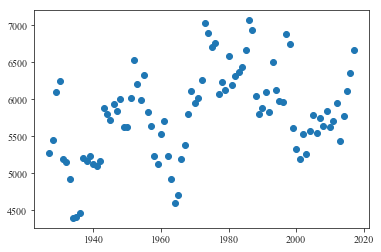

In [56]:
plt.scatter(Niagara_flow['Water Year'], Niagara_flow['CFS']*0.028316847, zorder=10)

In [57]:
Niagara_flow.mean()*0.02831684*1.04

Water Year      58.074441
CFS           6038.121151
dtype: float64

In [58]:
water_level_2.groupby('year').mean()['Erie'].mean()

174.14712499999993

In [59]:
(water_level_2.groupby('year').mean()['Erie'].values[-1] - water_level_2.groupby('year').mean()['Erie'].values[-15])/15

0.04099999999999871

In [60]:
(Niagara_flow['CFS']*0.028316847*1.03).mean()

5980.063772151427

# Numbers

In [82]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600


In [83]:
(51+98)/(5970+429)

0.023284888263791218

# Correlations

In [127]:
sp.stats.pearsonr(PDO[1:][['JAN', 'FEB', 'MAR', 'DEC']].mean(axis=1).values[:-2], Precip_mm.Year[:-6].values)

(-0.00979207290611374, 0.9165481832108084)

In [126]:
PDO.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [122]:
import scipy as sp

WL in SCR and LE

In [85]:
sp.stats.pearsonr(stclair_river_level_an.Value.values, water_level_2[water_level_2.year>1926].groupby('year').mean()['Erie'].values)



(0.9506923713277396, 4.960870051607793e-47)

In [86]:
import scipy as sp

sp.stats.pearsonr(water_level.groupby('year').mean()['Erie'].diff().values[1:], nino4_agg.groupby('Year').mean()[nino4_agg[nino4_agg.M_n.isin([1,2,3,12])].groupby('Year').mean().index>1917][0].values[2:-1])




NameError: name 'nino4_agg' is not defined

In [87]:
sp.stats.pearsonr(water_level.groupby('year').mean()['Erie'].diff().values[1:], nino4_agg.groupby('Year').mean()[nino4_agg[nino4_agg.M_n.isin([1,2,3,12])].groupby('Year').mean().index>1917][0].values[2:-1])

NameError: name 'nino4_agg' is not defined

In [88]:
sp.stats.pearsonr(water_level_2.groupby('year').mean()['Erie'].values[:-2], Precip_mm.Total[18:-7].values)

(0.2623485914980282, 0.009062811535095786)

In [89]:
sp.stats.pearsonr(movingaverage(Precip_mm.Total, 10)[18:-11], water_level_2.groupby('year').mean()['Erie'].values[:-6])



(0.409391707688665, 4.1823560043219213e-05)

In [90]:
Precip_mm.Year[5:], movingaverage(Precip_mm.Total, 10)[5:]

(5      1905.0
 6      1906.0
 7      1907.0
 8      1908.0
 9      1909.0
 10     1910.0
 11     1911.0
 12     1912.0
 13     1913.0
 14     1914.0
 15     1915.0
 16     1916.0
 17     1917.0
 18     1918.0
 19     1919.0
 20     1920.0
 21     1921.0
 22     1922.0
 23     1923.0
 24     1924.0
 25     1925.0
 26     1926.0
 27     1927.0
 28     1928.0
 29     1929.0
 30     1930.0
 31     1931.0
 32     1932.0
 33     1933.0
 34     1934.0
 35     1935.0
 36     1936.0
 37     1937.0
 38     1938.0
 39     1939.0
 40     1940.0
 41     1941.0
 42     1942.0
 43     1943.0
 44     1944.0
 45     1945.0
 46     1946.0
 47     1947.0
 48     1948.0
 49     1949.0
 50     1950.0
 51     1951.0
 52     1952.0
 53     1953.0
 54     1954.0
 55     1955.0
 56     1956.0
 57     1957.0
 58     1958.0
 59     1959.0
 60     1960.0
 61     1961.0
 62     1962.0
 63     1963.0
 64     1964.0
 65     1965.0
 66     1966.0
 67     1967.0
 68     1968.0
 69     1969.0
 70     1970.0
 71     19

# Change in storage

In [91]:
water_level_2.groupby('year').mean()['Erie'].values[-1]* Area_ecl_stClair /(60*60*24*365)

142516.77363436494

In [92]:
change_in_storage_LE = Area_ecl_stClair /(60*60*24*365)*(np.diff(water_level_2.groupby('year').mean()['Erie'].values[-16:])).mean()


In [93]:
change_in_storage_LE * conversion_fac_mmy_to_cms_st_clair/(conversion_fac_mmy_to_cms_eastern+ conversion_fac_mmy_to_cms_central + conversion_fac_mmy_to_cms_western)





1.230477338068681

$$\Delta V$$

In [94]:
water_level_2.groupby('year').mean()['Erie'].values[-1] - water_level_2.groupby('year').mean()['Erie'].values[-15]

0.6149999999999807

# Water input

In [95]:
Total  = 5096 + 1017 + 885

In [96]:
5096/Total

0.7282080594455559

# Water Levels

In [131]:
wl_latest = pd.read_csv('../../measurements/great_lakes_water_levels.csv', skiprows=12)

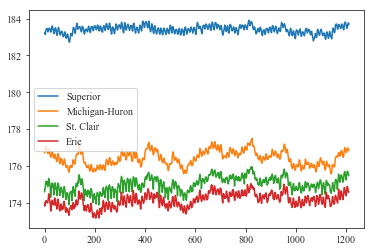

In [132]:
wl_latest[['Superior', 'Michigan-Huron', 'St. Clair', 'Erie']].plot()

In [99]:
%matplotlib  inline

In [142]:
wl_latest.groupby('year').mean()[85:-1].round(2).T




year              2003    2004    2005    2006    2007    2008    2009  \
Superior        183.19  183.30  183.33  183.18  182.98  183.21  183.26   
Michigan-Huron  175.89  176.11  176.09  176.02  175.94  176.00  176.26   
St. Clair       174.74  174.92  174.94  174.89  174.85  174.92  175.08   
Erie            173.97  174.12  174.17  174.14  174.14  174.16  174.25   
Ontario          74.71   74.85   74.81   74.83   74.75   74.87   74.87   

year              2010    2011    2012    2013    2014    2015    2016    2017  
Superior        183.14  183.09  183.10  183.22  183.51  183.57  183.58  183.63  
Michigan-Huron  176.11  176.04  175.92  175.90  176.30  176.59  176.70  176.77  
St. Clair       174.85  174.95  174.85  174.82  175.05  175.20  175.35  175.47  
Erie            174.06  174.24  174.13  174.06  174.21  174.32  174.41  174.58  
Ontario          74.67   74.80   74.69   74.74   74.77   74.74   74.80   75.18

In [145]:
wl_latest.groupby('year').mean()[85:-1].corr().round(2)

Superior  Michigan-Huron  St. Clair  Erie  Ontario
Superior            1.00            0.90       0.85  0.74     0.48
Michigan-Huron      0.90            1.00       0.97  0.90     0.54
St. Clair           0.85            0.97       1.00  0.97     0.67
Erie                0.74            0.90       0.97  1.00     0.74
Ontario             0.48            0.54       0.67  0.74     1.00

In [100]:
wl_latest.columns

Index(['month', 'year', 'Superior', 'Michigan-Huron', 'St. Clair', 'Erie',
       'Ontario'],
      dtype='object')

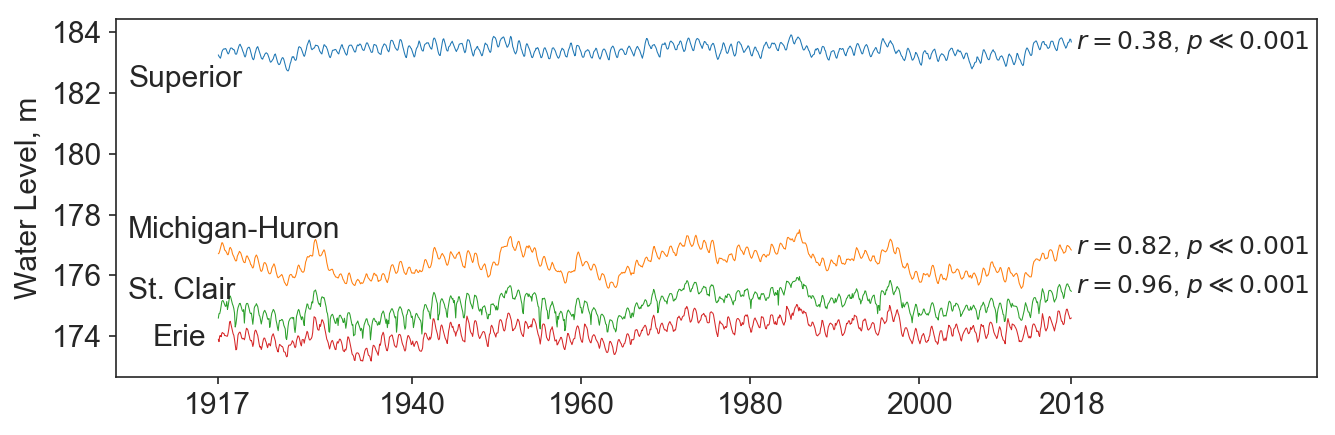

In [101]:
f, ax = plt.subplots(1,1, figsize=(9,3), dpi=150, sharex=True)
sns.lineplot(x=(wl_latest.index+1)/12+1917, y=wl_latest['Superior'], lw=0.5)
sns.lineplot(x=(wl_latest.index+1)/12+1917, y=wl_latest['Michigan-Huron'], lw=0.5)
sns.lineplot(x=(wl_latest.index+1)/12+1917, y=wl_latest['St. Clair'], lw=0.5)
sns.lineplot(x=(wl_latest.index+1)/12+1917, y=wl_latest['Erie'], lw=0.5)
ax.set_ylabel('Water Level, m', fontsize='x-large')
ax.set_xlabel('')
ax.set_xlim(1905,2047)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')

props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='white')
ax.text(0.01, 0.87, 'Superior', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
ax.text(0.01, 0.45, 'Michigan-Huron', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
ax.text(0.01, 0.28, 'St. Clair', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')
ax.text(0.03, 0.15, 'Erie', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='x-large')

ax.text(0.8, 0.97, '$r=0.38$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
ax.text(0.8, 0.4, '$r=0.82$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')
ax.text(0.8, 0.29, '$r=0.96$, $p\ll0.001$', transform=ax.transAxes,verticalalignment='top', bbox=props, fontsize='large')

plt.xticks([1917, 1940, 1960, 1980, 2000, 2018])

plt.tight_layout()

plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/water_level.pdf', dpi=f.dpi)
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/water_level.pdf', dpi=f.dpi)

In [102]:
wl_latest.tail()

month  year  Superior  Michigan-Huron  St. Clair    Erie  Ontario
1207   aug  2018    183.65          176.95     175.64  174.72    74.91
1208   sep  2018    183.70          176.94     175.62  174.66    74.74
1209   oct  2018    183.77          176.90     175.52  174.57    74.62
1210   nov  2018    183.76          176.86     175.50  174.58    74.62
1211   dec  2018    183.67          176.83     175.47  174.60    74.71

In [103]:
sp.stats.pearsonr(wl_latest.Superior, wl_latest.Erie)


(0.386089549476299, 2.285696068952066e-44)

In [104]:
sp.stats.pearsonr(wl_latest['Michigan-Huron'], wl_latest.Erie)

(0.8241402602202191, 5.131019144387412e-301)

In [105]:
sp.stats.pearsonr(wl_latest['St. Clair'], wl_latest.Erie)

(0.9641732224754728, 0.0)